The original data consist of 17 mixed (categorical and numeric) features with missing values and outliers. They fall into 
three main groups: 

<b><u>A.  The demographical information</b></u><font color='blue'>
1. customer_age
2. education
3. job_type
4. marital status</font>

<b><u>B. Information related to banking</b></u><font color='blue'>
1. balance
2. default
3. perosnal_loan
4. housing_loans
5. term_deposit_subscribed </font>

<b><u>C. Data about the current and prior campaigns</b></u><font color='blue'>
1. communication type
2. day_of_month
3. month
4. last contact duration
5. number of contacts in campaign
6. days passed since last campaign contact
7. num_contacts_prev_campaign
8. outcome of the previous campaign</font>

In [259]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Deciding factors will be 
1. case study approach, 
2. Out of box idea/thinking, 
3. Machine Learning Model and approach, 
4. bringing out insights from data thoroughness and many more along with good presentation skills.

In [260]:
# Load the dataset
train = pd.read_csv('Train data.csv')
test = pd.read_csv('Test data.csv')
print('Train data')
display(train.head())
print('Test data')
display(test.head())

Train data


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


Test data


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [261]:
# Shape of train and test data
print('Shape of train data is ',train.shape)
print('Shape of test data is ',test.shape)

Shape of train data is  (31647, 18)
Shape of test data is  (13564, 17)


In [262]:
# column wise data analysis
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [263]:
target_variable  = set(list(train.columns)) - set(list(test.columns))
target_variable

{'term_deposit_subscribed'}

In [264]:
positive = train['term_deposit_subscribed'].value_counts()[1]
negaitive = train['term_deposit_subscribed'].value_counts()[0]
print('Minority samples (positive) are', positive)
print('Majority samples (positive) are', negaitive)
print('Class Imabalance ratio is ', 100 - 100*round(positive/train.shape[0],2),':',100*round(positive/train.shape[0],2))

Minority samples (positive) are 3394
Majority samples (positive) are 28253
Class Imabalance ratio is  89.0 : 11.0


### Object variable Anlaysis 

In [265]:
len(train.id.unique()) # all the values are unique, drop
train.drop('id',1,inplace = True) # Don't consider in the modelling

In [266]:
for col in train.columns:
    if train[col].dtype == 'O':
        print(col,'Missing = ',train[col].isna().sum(),'\n')
        print(train[col].value_counts(), end = '\n---------------------------------------------------\n')

job_type Missing =  0 

blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64
---------------------------------------------------
marital Missing =  150 

married     18945
single       8857
divorced     3695
Name: marital, dtype: int64
---------------------------------------------------
education Missing =  0 

secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: education, dtype: int64
---------------------------------------------------
default Missing =  0 

no     31094
yes      553
Name: default, dtype: int64
---------------------------------------------------
housing_loan Missing =  0 

yes    17700
no     13947
Name: housing_loan, dtype: int64
---------------------------------------------------
personal_loan Missing

In [267]:
num_col = []
for col in train.columns:
    if train[col].dtype == 'float64' or train[col].dtype == 'int64':
        print(col,'Missing = ',train[col].isna().sum(),'\n----------------------------------------')
        num_col.append(col)
num_col

customer_age Missing =  619 
----------------------------------------
balance Missing =  399 
----------------------------------------
day_of_month Missing =  0 
----------------------------------------
last_contact_duration Missing =  311 
----------------------------------------
num_contacts_in_campaign Missing =  112 
----------------------------------------
days_since_prev_campaign_contact Missing =  25831 
----------------------------------------
num_contacts_prev_campaign Missing =  0 
----------------------------------------
term_deposit_subscribed Missing =  0 
----------------------------------------


['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign',
 'term_deposit_subscribed']

# EDA and Data Preparation, done parallely

#### Customer_age 
1. Distribution of customer_age is a slightly positively skewed but still very similar to normal distribution. 
2. There are 619 missing values in the customer_age columns which will be imputed after treating the outliers
3. Range of customer_age column is 18-97. For target class 1 and 0, outliers are behaving similarly as we can see in the box plot, so we have treated them together using the Inter-Quartile-Range and capped all all the values more than 72.
4. Since the dataset in imabalanced, we have used the median of age for term_deposit_subscribed = 1 to impute missing age with term_deposit = 1 and same is for term_deposit_subscribed = 0. 

Since dataset is imbalanced and we didn't to dominate the major class samples while imputing the missing values. We adopted this approach. 

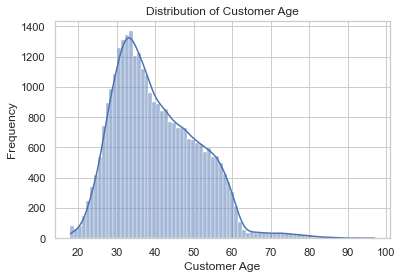

In [268]:
# Plot histogram of customer_age
ax = sns.histplot(data=train, x="customer_age", kde=True)
ax.set(ylabel='Frequency', xlabel='Customer Age')
plt.title("Distribution of Customer Age")
plt.show()
# histogram is right-skewed, but also similar to normal distribution
# A few customers for the bank are more than 60 years of age. 

In [269]:
print('Minimum age: ', train.customer_age.min())
print('Maximum age: ',train.customer_age.max())
print('Mean value: ', round(train.customer_age.mean(),2))
print('Median value: ',round(train.customer_age.median(),2))
print('Standard deviation: ', round(train.customer_age.std(),2))
print('Null values: ',train.customer_age.isnull().sum())

Minimum age:  18.0
Maximum age:  97.0
Mean value:  40.44
Median value:  39.0
Standard deviation:  10.75
Null values:  619


In [270]:
# cap outliers of this values. Mostly values more than 70 years old are removed.
# Area between quantile 0.25 and 0.75 doesn’t change too much after this operation.
# write code for Box-plots of customer_age age with and without outliers.
# How to remove outliers
# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [271]:
# Quartiles
Q1=train.customer_age.quantile(q=0.25)
Q3=train.customer_age.quantile(q=0.75)
print('1st Quartile (Q1) of Customer Age is ', Q1)
print('3rd Quartile (Q3) of Customer Age is ', Q3)

1st Quartile (Q1) of Customer Age is  32.0
3rd Quartile (Q3) of Customer Age is  48.0


In [272]:
# Outlier Detection from IQR
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages ', L_outliers)
print('Upper outliers in Ages ', U_outliers)

Lower outliers in Ages  8.0
Upper outliers in Ages  72.0


In [273]:
print('Number of outliers in customer_age upper : ', train[train['customer_age']>72]['customer_age'].count())
print('Number of outliers in customer_age lower : ', train[train['customer_age']<18]['customer_age'].count())
print('% of Outlier in customer_age upper: ',round(train[train['customer_age']>72]['customer_age'].count()*100/len(train)), '%')
print('% of Outlier in customer_age lower: ',round(train[train['customer_age']<18]['customer_age'].count()*100/len(train)), '%')

Number of outliers in customer_age upper :  257
Number of outliers in customer_age lower :  0
% of Outlier in customer_age upper:  1 %
% of Outlier in customer_age lower:  0 %


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


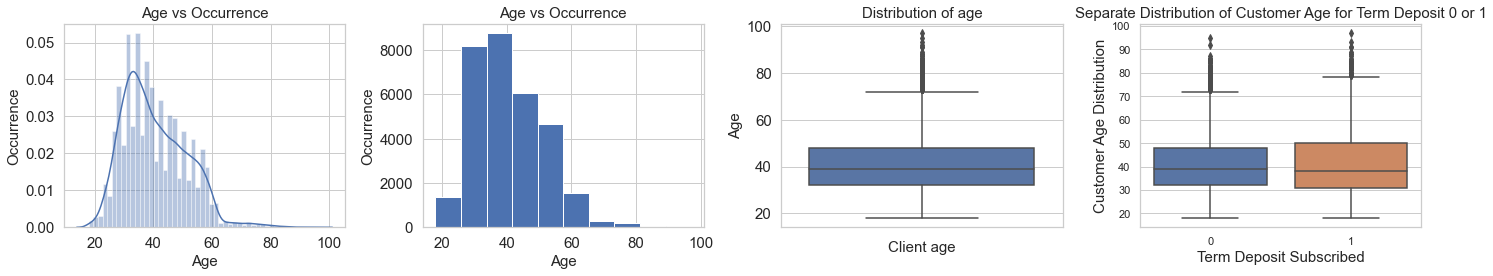

In [274]:
# Customer Age Distribution before outlier treatment and before missing value imputation
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#distplot
sns.distplot(train['customer_age'],ax=ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Age vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(train['customer_age'])
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='customer_age',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client age',fontsize=15)
ax3.set_ylabel('Age',fontsize=15)
ax3.set_title('Distribution of age',fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="customer_age", data=train, ax = ax4)
ax4.set_ylabel('Customer Age Distribution',fontsize=15)
ax4.set_xlabel('Term Deposit Subscribed',fontsize=15)
ax4.set_title("Separate Distribution of Customer Age for Term Deposit 0 or 1",fontsize=15)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 
plt.savefig('Customer Age Distribution before outlier treatment and before missing value imputation.png')

<font color = 'red'>1. Distribution for clients, who subscribed a term deposit is more diffused, but it is because people,who said yes is less. </font>

C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


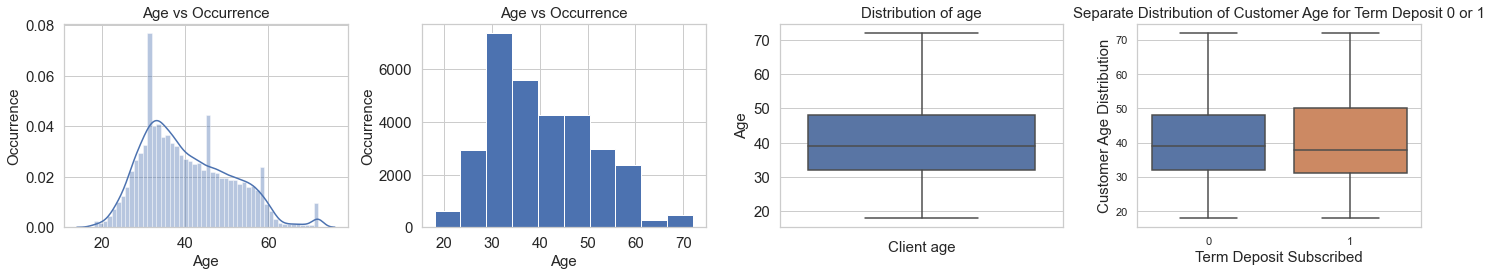

In [275]:
# Customer Age Distribution after outlier treatment
train.loc[train.customer_age > 72,['customer_age']] = 72

fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#distplot
sns.distplot(train['customer_age'],ax=ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Age vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(train['customer_age'])
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='customer_age',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client age',fontsize=15)
ax3.set_ylabel('Age',fontsize=15)
ax3.set_title('Distribution of age',fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="customer_age", data=train, ax = ax4)
ax4.set_ylabel('Customer Age Distribution',fontsize=15)
ax4.set_xlabel('Term Deposit Subscribed',fontsize=15)
ax4.set_title("Separate Distribution of Customer Age for Term Deposit 0 or 1",fontsize=15)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 
plt.savefig('Customer Age Distribution after outlier treatment and missing value imputation.png')

In [276]:
val0 = train[train.term_deposit_subscribed == 0].customer_age.median()
val0

39.0

In [277]:
val1 = train[train.term_deposit_subscribed == 1].customer_age.median()
val1

38.0

Yes


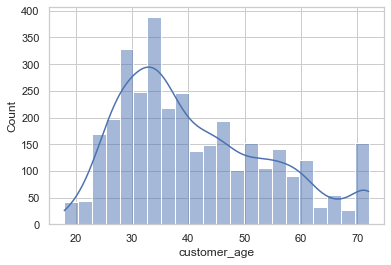

No


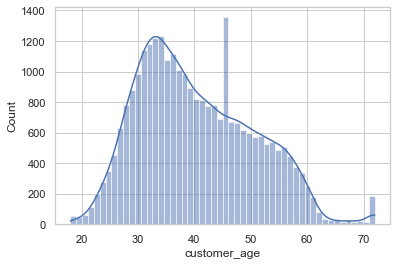

In [278]:
# Plot histogram of customer_age
print('Yes')
sns.histplot(data=train[train.term_deposit_subscribed == 1], x="customer_age", kde=True)
plt.show()

print('No')
# Plot histogram of customer_age
sns.histplot(data=train[train.term_deposit_subscribed == 0], x="customer_age", kde=True)
plt.show()

In [279]:
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.customer_age[i]) == True:
        train.customer_age[i] = val0
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.customer_age[i]) == True:
        train.customer_age[i] = val1

<ipython-input-279-5852081b7c32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.customer_age[i] = val0
<ipython-input-279-5852081b7c32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.customer_age[i] = val1


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


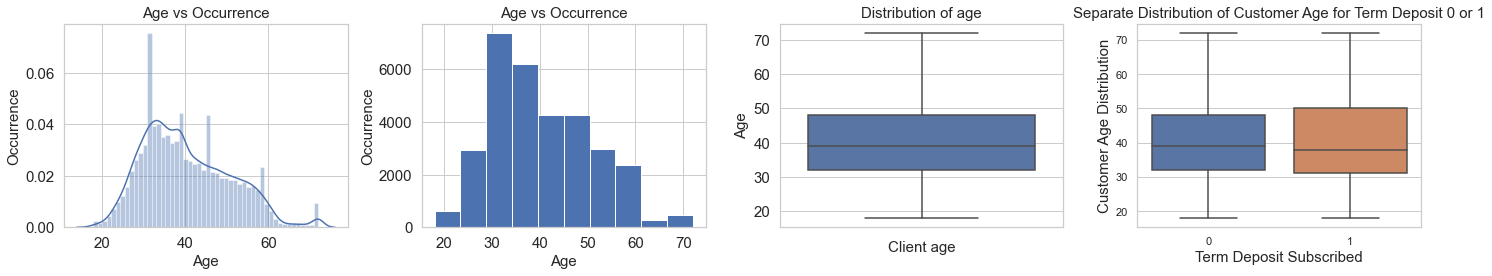

In [280]:
# Customer Age Distribution after missing value imputation

fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#distplot
sns.distplot(train['customer_age'],ax=ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Age vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#histogram
ax2.hist(train['customer_age'])
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='customer_age',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client age',fontsize=15)
ax3.set_ylabel('Age',fontsize=15)
ax3.set_title('Distribution of age',fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="customer_age", data=train, ax = ax4)
ax4.set_ylabel('Customer Age Distribution',fontsize=15)
ax4.set_xlabel('Term Deposit Subscribed',fontsize=15)
ax4.set_title("Separate Distribution of Customer Age for Term Deposit 0 or 1",fontsize=15)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 

<font color='red'>1. Outlier should not be treated as Missing Value</font>

<font color='red'>2. Maximum number of customers who subscribed term deposits are from 32 to 48 years of age </font>

#### Job Type 
1. There are no missing value in the job_type column. But we will treat 'unknown' category as missing value which accounts for 0.63 % of total obervations. 
2. We assume these 'unknow' values have not been recorded, as all the customers are not always comfortable in sharing their details. 
3. We have used the mode of job_type for term_deposit_subscribed = 1 to impute missing job_type with term_deposit = 1 and same is for term_deposit_subscribed = 0.

In [281]:
job_type_ = list(train.job_type.value_counts().index)
job_type_count = [train.job_type.value_counts()[i] for i in range(len(train.job_type.value_counts()))]
job_percent = [round(100*train.job_type.value_counts()[i]/train.shape[0],2) for i in range(len(train.job_type.value_counts()))]

job_df = pd.DataFrame({'Job Type': job_type_,'Count' : job_type_count,'Percentage' : job_percent})
job_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
Job Type,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
Count,6816,6666,5220,3627,2923,1591,1111,1037,901,893,663,199
Percentage,21.54,21.06,16.49,11.46,9.24,5.03,3.51,3.28,2.85,2.82,2.09,0.63


In [282]:
train[train.term_deposit_subscribed == 0].job_type.value_counts()

blue-collar      6363
management       5821
technician       4701
admin.           3247
services         2692
retired          1246
self-employed     981
entrepreneur      961
housemaid         820
unemployed        763
student           484
unknown           174
Name: job_type, dtype: int64

In [283]:
job0 = train[train.term_deposit_subscribed == 0].job_type.mode()
job0[0]

'blue-collar'

In [284]:
train[train.term_deposit_subscribed == 1].job_type.value_counts()

management       845
technician       519
blue-collar      453
admin.           380
retired          345
services         231
student          179
unemployed       138
self-employed    130
entrepreneur      76
housemaid         73
unknown           25
Name: job_type, dtype: int64

In [285]:
job1 = train[train.term_deposit_subscribed == 1].job_type.mode()
job1[0]

'management'

In [286]:
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and (train.job_type[i]) == 'unknown':
        train.job_type[i] = job0[0]
    elif train.term_deposit_subscribed[i] == 1 and (train.job_type[i]) == 'unknown':
        train.job_type[i] = job1[0]

<ipython-input-286-e092f3cb2446>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.job_type[i] = job0[0]
<ipython-input-286-e092f3cb2446>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.job_type[i] = job1[0]


In [287]:
job_type_ = list(train.job_type.value_counts().index)
job_type_count = [train.job_type.value_counts()[i] for i in range(len(train.job_type.value_counts()))]
job_percent = [round(100*train.job_type.value_counts()[i]/train.shape[0],2) for i in range(len(train.job_type.value_counts()))]

job_df = pd.DataFrame({'Job Type': job_type_,'Count' : job_type_count,'Percentage' : job_percent})
job_df.T

,0,1,2,3,4,5,6,7,8,9,10
Job Type,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student
Count,6990,6691,5220,3627,2923,1591,1111,1037,901,893,663
Percentage,22.09,21.14,16.49,11.46,9.24,5.03,3.51,3.28,2.85,2.82,2.09


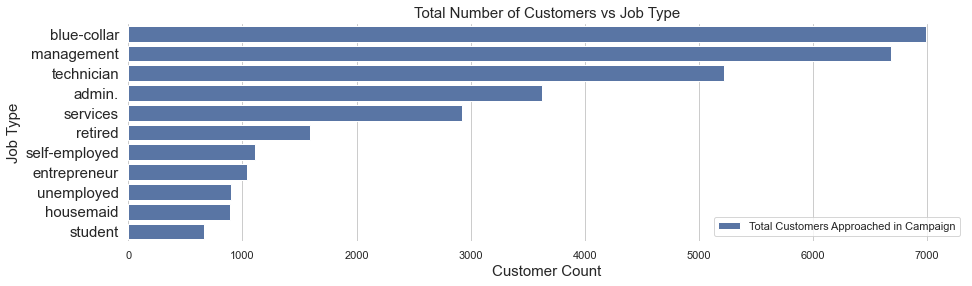

In [288]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(x="Count", y="Job Type", data=job_df,label="Total Customers Approached in Campaign", color="b")
sns.set_color_codes("pastel")

plt.title("Total Number of Customers vs Job Type",fontsize=15)
plt.xlabel("Customer Count",fontsize=15)
plt.ylabel("Job Type",fontsize=15)
plt.yticks(fontsize=15)


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('Job1.png')

In [289]:
# the job type that subscribed to a term deposit the most is the blue collar, followed by management and student has the
# least subscription to a term deposit. We have considerd ’unknown’ variables as missing values.

In [290]:
train0 = train[train['term_deposit_subscribed'] == 0]
job_type0_ = list(train0.job_type.value_counts().index)
job_type_count0 = [train0.job_type.value_counts()[i] for i in range(len(train0.job_type.value_counts()))]
job_percent0 = [round(100*train0.job_type.value_counts()[i]/train0.shape[0],2) for i in range(len(train0.job_type.value_counts()))]

job_df0 = pd.DataFrame({'Job Type': job_type0_,'Count' : job_type_count0,'Percentage' : job_percent0})
job_df0.T

,0,1,2,3,4,5,6,7,8,9,10
Job Type,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,housemaid,unemployed,student
Count,6537,5821,4701,3247,2692,1246,981,961,820,763,484
Percentage,23.14,20.6,16.64,11.49,9.53,4.41,3.47,3.4,2.9,2.7,1.71


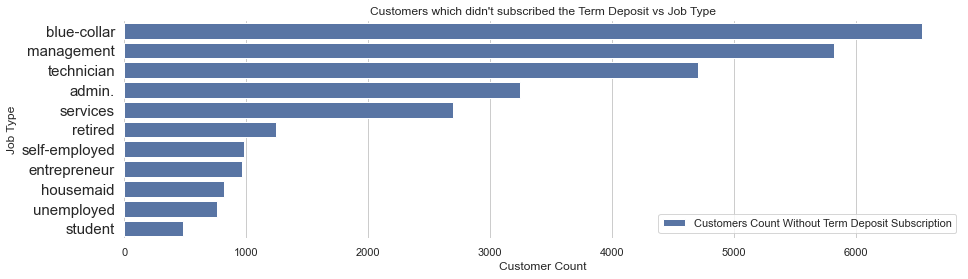

In [291]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(x="Count", y="Job Type", data=job_df0,label="Customers Count Without Term Deposit Subscription", color="b")
plt.xlabel("Customer Count")
plt.yticks(fontsize=15)
plt.title("Customers which didn't subscribed the Term Deposit vs Job Type")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

In [292]:
train1 = train[train['term_deposit_subscribed'] == 1]
job_type1_ = list(train1.job_type.value_counts().index)
job_type_count1 = [train1.job_type.value_counts()[i] for i in range(len(train1.job_type.value_counts()))]
job_percent1 = [round(100*train1.job_type.value_counts()[i]/train1.shape[0],2) for i in range(len(train1.job_type.value_counts()))]

job_df1 = pd.DataFrame({'Job Type': job_type1_,'Count' : job_type_count1,'Percentage' : job_percent1})
job_df1.T

,0,1,2,3,4,5,6,7,8,9,10
Job Type,management,technician,blue-collar,admin.,retired,services,student,unemployed,self-employed,entrepreneur,housemaid
Count,870,519,453,380,345,231,179,138,130,76,73
Percentage,25.63,15.29,13.35,11.2,10.16,6.81,5.27,4.07,3.83,2.24,2.15


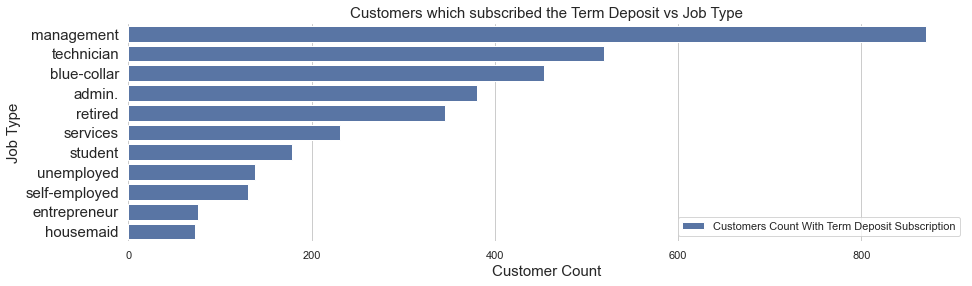

In [293]:
# Keep this
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(x="Count", y="Job Type", data=job_df1,label="Customers Count With Term Deposit Subscription", color="b")
plt.xlabel("Customer Count",fontsize=15)
plt.ylabel("Job Type",fontsize=15)
plt.yticks(fontsize=15)
plt.title("Customers which subscribed the Term Deposit vs Job Type",fontsize=15)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('Job2.png')

1. Management background customers are more interested in subscribing the term deposits followed by technician and blue collar.
2. Number of Management background customers appraoched were lesser then blue collar back ground customers. But Management people have subscribed more than blue collar people.
3. There are more chances to increase the term deposit subscription if management people are focussed more. 
4. Number of technicians approached we lesser than blue collar were technicians subscried more than blue collar people. 

<b>Recommendations for Customer Segment</b>
1. It seems company is focussing more on blue collar job people more but data says management and technician and more prime customers compared to blue-collar as they have shown more interest in subscribing the term deposit. 
2. Top 3 recommendations in priority order will be Management, Technician and Blue Collar. 
3. Student are to be approached more. They were called least but customer who subscribed to term deposit are higher than unemployed, self-employed, entrepreneur and housemaid. Students are opportunistic customer segment. 

In [294]:
(train.marital.isna().sum()/train.shape[0])*100

0.4739785761683572

#### Marital
1. 150 missing values which makes 0.47% of total marital observtions. 
2. Missing values are imputed using mode of respective target class. 

In [295]:
marital_ = list(train.marital.value_counts().index)
marital_count = [train.marital.value_counts()[i] for i in range(len(train.marital.value_counts()))]
marital_percent = [round(100*train.marital.value_counts()[i]/train.shape[0],2) for i in range(len(train.marital.value_counts()))]

yes_marital = train[train.term_deposit_subscribed == 1]
marital_yes_dep = [yes_marital.marital.value_counts()[i] for i in range(len(yes_marital.marital.value_counts()))]
marital_df = pd.DataFrame({'Marital Type': marital_,'Count' : marital_count,'Percentage' : marital_percent,'Yes': marital_yes_dep})
marital_df

,Marital Type,Count,Percentage,Yes
0,married,18945,59.86,1763
1,single,8857,27.99,1227
2,divorced,3695,11.68,392


In [296]:
train[train.term_deposit_subscribed == 0].marital.value_counts()

married     17182
single       7630
divorced     3303
Name: marital, dtype: int64

In [297]:
mar0 = train[train.term_deposit_subscribed == 0].marital.mode()
mar0[0]

'married'

In [298]:
train[train.term_deposit_subscribed == 0].marital.isna().sum()

138

In [299]:
train[train.term_deposit_subscribed == 1].marital.value_counts()

married     1763
single      1227
divorced     392
Name: marital, dtype: int64

In [300]:
train[train.term_deposit_subscribed == 1].marital.isna().sum()

12

In [301]:
mar1 = train[train.term_deposit_subscribed == 1].marital.mode()
mar1[0]

'married'

In [302]:
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.marital[i]) == True:
        train.marital[i] = mar0[0]
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.marital[i]) == True:
        train.marital[i] = mar1[0]

<ipython-input-302-6a477d9ddf20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.marital[i] = mar0[0]
<ipython-input-302-6a477d9ddf20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.marital[i] = mar1[0]


In [303]:
train.marital.isna().sum()

0

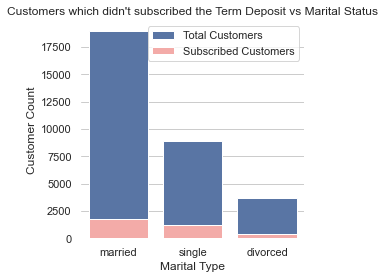

In [304]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Marital Type", data=marital_df,label="Total Customers", color="b")
sns.set_color_codes("pastel")
sns.barplot(y="Yes", x="Marital Type", data=marital_df, label="Subscribed Customers", color="r")
plt.ylabel("Customer Count")
plt.title("Customers which didn't subscribed the Term Deposit vs Marital Status")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('marital.png')

In [305]:
train0 = train[train['term_deposit_subscribed'] == 0]
marital0_ = list(train0.marital.value_counts().index)
marital_count0 = [train0.marital.value_counts()[i] for i in range(len(train0.marital.value_counts()))]
marital_percent0 = [round(100*train0.marital.value_counts()[i]/train0.shape[0],2) for i in range(len(train0.marital.value_counts()))]

marital_df0 = pd.DataFrame({'Marital Status': marital0_,'Count' : marital_count0,'Percentage' : marital_percent0})
marital_df0.T

,0,1,2
Marital Status,married,single,divorced
Count,17320,7630,3303
Percentage,61.3,27.01,11.69


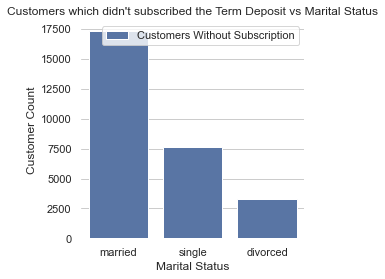

In [306]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Marital Status", data=marital_df0,label="Customers Without Subscription", color="b")
plt.ylabel("Customer Count")
plt.title("Customers which didn't subscribed the Term Deposit vs Marital Status")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

In [307]:
train1 = train[train['term_deposit_subscribed'] == 1]
marital1_ = list(train1.marital.value_counts().index)
marital_count1 = [train1.marital.value_counts()[i] for i in range(len(train1.marital.value_counts()))]
marital_percent1 = [round(100*train1.marital.value_counts()[i]/train1.shape[0],2) for i in range(len(train1.marital.value_counts()))]

marital_df1 = pd.DataFrame({'Marital Status': marital1_,'Count' : marital_count1,'Percentage' : marital_percent1})
marital_df1.T

,0,1,2
Marital Status,married,single,divorced
Count,1775,1227,392
Percentage,52.3,36.15,11.55


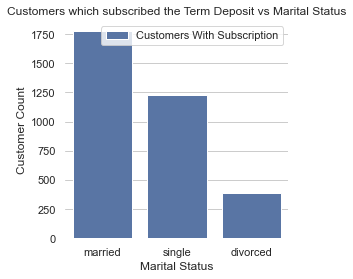

In [308]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Marital Status", data=marital_df1,label="Customers With Subscription", color="b")
plt.ylabel("Customer Count")
plt.title("Customers which subscribed the Term Deposit vs Marital Status")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

<b> Inference </b>
1. Married has the census count with the highest subscribed and unsubscribed to a term deposit, followed by the single
while the divorced has the least subscribed and unsubscribed to a term deposit. 
2. Married people are the biggest group of analysed clients.

Recommendation
1. Single people have high chances of subscribing to term deposit. They should be approached more. 

#### Education 
1. 0 missing value, but there are some values with 'unknown' category, we will treat them as missing value. 
2. Missing values are imputed using mode of respective target class.

In [309]:
education_ = list(train.education.value_counts().index)
education_count = [train.education.value_counts()[i] for i in range(len(train.education.value_counts()))]
education_percent = [round(100*train.education.value_counts()[i]/train.shape[0],2) for i in range(len(train.education.value_counts()))]

yes_education = train[train.term_deposit_subscribed == 1]
education_yes_dep = [yes_education.education.value_counts()[i] for i in range(len(yes_education.education.value_counts()))]
education_df = pd.DataFrame({'Education Type': education_,'Count' : education_count,'Percentage' : education_percent,'Yes': education_yes_dep})
education_df

,Education Type,Count,Percentage,Yes
0,secondary,16247,51.34,1541
1,tertiary,9321,29.45,1301
2,primary,4787,15.13,388
3,unknown,1292,4.08,164


In [310]:
train.education.isna().sum()

0

In [311]:
train[train.term_deposit_subscribed == 0].education.value_counts()

secondary    14706
tertiary      8020
primary       4399
unknown       1128
Name: education, dtype: int64

In [312]:
ed0 = train[train.term_deposit_subscribed == 0].education.mode()
ed0[0]

'secondary'

In [313]:
train[train.term_deposit_subscribed == 0].education.isna().sum()

0

In [314]:
train[train.term_deposit_subscribed == 1].education.value_counts()

secondary    1541
tertiary     1301
primary       388
unknown       164
Name: education, dtype: int64

In [315]:
train[train.term_deposit_subscribed == 1].marital.isna().sum()

0

In [316]:
ed1 = train[train.term_deposit_subscribed == 1].education.mode()
ed1[0]

'secondary'

In [317]:
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and (train.education[i]) == 'unknown':
        train.education[i] = ed0[0]
    elif train.term_deposit_subscribed[i] == 1 and (train.education[i]) == 'unknown':
        train.education[i] = ed1[0]

<ipython-input-317-58fadcf3599d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.education[i] = ed0[0]
<ipython-input-317-58fadcf3599d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.education[i] = ed1[0]


In [318]:
education_ = list(train.education.value_counts().index)
education_count = [train.education.value_counts()[i] for i in range(len(train.education.value_counts()))]
education_percent = [round(100*train.education.value_counts()[i]/train.shape[0],2) for i in range(len(train.education.value_counts()))]

yes_education = train[train.term_deposit_subscribed == 1]
education_yes_dep = [yes_education.education.value_counts()[i] for i in range(len(yes_education.education.value_counts()))]
education_df = pd.DataFrame({'Education Type': education_,'Count' : education_count,'Percentage' : education_percent,'Yes': education_yes_dep})
education_df

,Education Type,Count,Percentage,Yes
0,secondary,17539,55.42,1705
1,tertiary,9321,29.45,1301
2,primary,4787,15.13,388


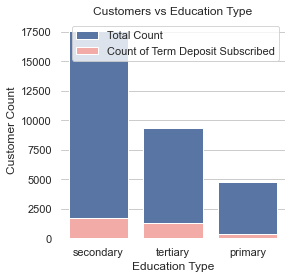

In [319]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Education Type", data=education_df,label="Total Count", color="b")
sns.set_color_codes("pastel")
sns.barplot(y="Yes", x="Education Type", data=education_df, label="Count of Term Deposit Subscribed", color="r")
plt.ylabel("Customer Count")
plt.title("Customers vs Education Type")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('education.png')

In [320]:
education_df.Count.sum()
# Treat unknown as missing value

31647

In [321]:
train1 = train[train.term_deposit_subscribed == 1]
education1_ = list(train1.education.value_counts().index)
education1_count = [train1.education.value_counts()[i] for i in range(len(train1.education.value_counts()))]
education1_percent = [round(100*train1.education.value_counts()[i]/train1.shape[0],2) for i in range(len(train1.education.value_counts()))]

education1_df = pd.DataFrame({'Education Type': education1_,'Count' : education1_count,'Percentage' : education1_percent})
education1_df

,Education Type,Count,Percentage
0,secondary,1705,50.24
1,tertiary,1301,38.33
2,primary,388,11.43


1. Difference number of customers approached between secondary and tertiary education is too wide but the difference between number of customers who subscribed to term deposits is not very much. It implies, tertiary education type customers are more likely to convert than secondary education type. We can try out by focussing more on tertiary education type customer as their ROI is more and they were not approached very much. 

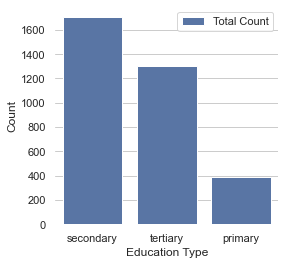

In [322]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Education Type", data=education1_df,label="Total Count", color="b")
sns.set_color_codes("pastel")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

In [323]:
train1 = train[train.term_deposit_subscribed == 0]
education1_ = list(train1.education.value_counts().index)
education1_count = [train1.education.value_counts()[i] for i in range(len(train1.education.value_counts()))]
education1_percent = [round(100*train1.education.value_counts()[i]/train1.shape[0],2) for i in range(len(train1.education.value_counts()))]

education1_df = pd.DataFrame({'Education Type': education1_,'Count' : education1_count,'Percentage' : education1_percent})
education1_df

,Education Type,Count,Percentage
0,secondary,15834,56.04
1,tertiary,8020,28.39
2,primary,4399,15.57


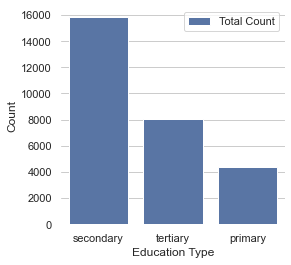

In [324]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Education Type", data=education1_df,label="Total Count", color="b")
sns.set_color_codes("pastel")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

In [325]:
# Job according to education graph is left to plot
train.default.isna().sum()

0

#### Default
1. 0 missing values

In [326]:
default_ = list(train.default.value_counts().index)
default_count = [train.default.value_counts()[i] for i in range(len(train.default.value_counts()))]
default_percent = [round(100*train.default.value_counts()[i]/train.shape[0],2) for i in range(len(train.default.value_counts()))]

yes_default = train[train.term_deposit_subscribed == 1]
default_yes_dep = [yes_default.default.value_counts()[i] for i in range(len(yes_default.default.value_counts()))]
default_df = pd.DataFrame({'Default Type': default_,'Count' : default_count,'Percentage' : default_percent,'Yes': default_yes_dep})
default_df

,Default Type,Count,Percentage,Yes
0,no,31094,98.25,3360
1,yes,553,1.75,34


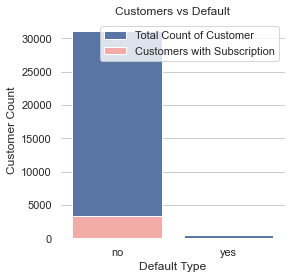

In [327]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Default Type", data=default_df,label="Total Count of Customer", color="b")
sns.set_color_codes("pastel")
sns.barplot(y="Yes", x="Default Type", data=default_df, label="Customers with Subscription", color="r")
plt.ylabel("Customer Count")
plt.title("Customers vs Default")


# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('default.png')

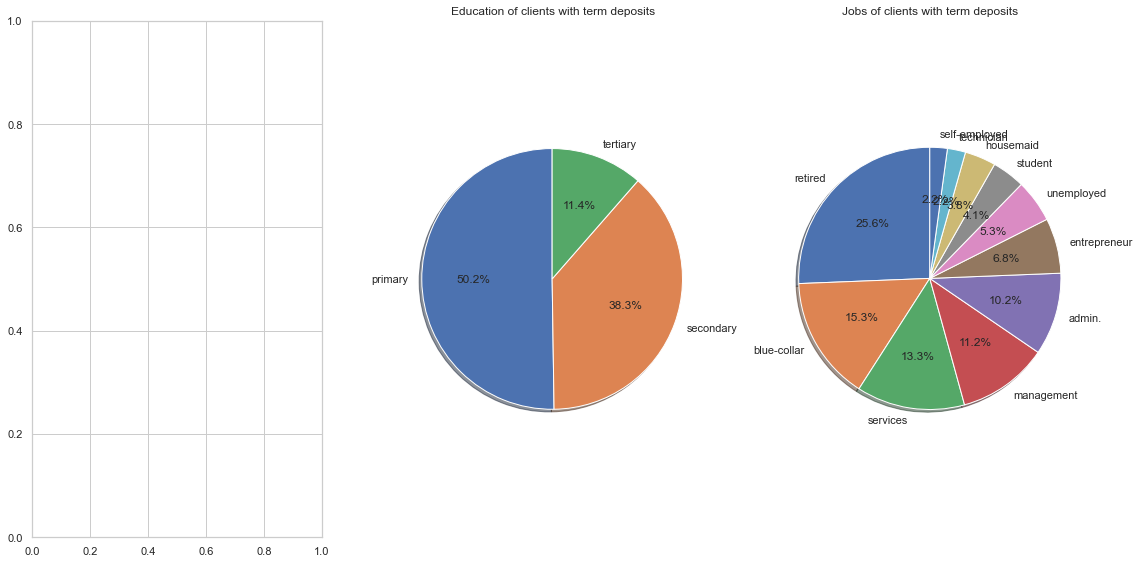

In [328]:
# some graphics to understand the clients who actually subscribed for a term deposit:

labels = train.marital[train.term_deposit_subscribed==1].unique()
sizes = train.marital[train.term_deposit_subscribed==1].value_counts()

labels1 = train.education[train.term_deposit_subscribed==1].unique()
sizes1 = train.education[train.term_deposit_subscribed==1].value_counts()

labels2 = train.housing_loan[train.term_deposit_subscribed==1].unique()
sizes2 = train.housing_loan[train.term_deposit_subscribed==1].value_counts()


labels3 = train.job_type[train.term_deposit_subscribed==1].unique()
sizes3 = train.job_type[train.term_deposit_subscribed==1].value_counts()


fig, ax = plt.subplots(1,3,sharey=False,figsize=(16,8))
# ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax[0].set_title("Relationship status of clients with term deposits")

ax[1].pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax[1].set_title("Education of clients with term deposits")

ax[2].pie(sizes3, labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax[2].set_title("Jobs of clients with term deposits")

plt.tight_layout()
plt.show()

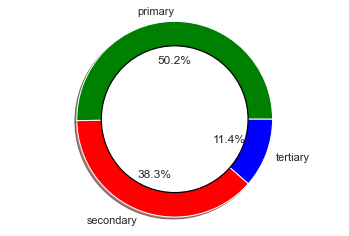

In [329]:
# The slices will be ordered and plotted counter-clockwise.
colors = ['green', 'red', 'blue']
explode = (0, 0, 0)  # explode a slice if required

plt.pie(sizes1, explode=explode, labels=labels1, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 

#### Housing Loan 

In [330]:
train.housing_loan.isna().sum()

0

In [331]:
housing_loan_ = list(train.housing_loan.value_counts().index)
housing_loan_count = [train.housing_loan.value_counts()[i] for i in range(len(train.housing_loan.value_counts()))]
housing_loan_percent = [round(100*train.housing_loan.value_counts()[i]/train.shape[0],2) for i in range(len(train.housing_loan.value_counts()))]

yes_housing_loan = train[train.term_deposit_subscribed == 1]
housing_loan_yes_dep = [yes_housing_loan.housing_loan.value_counts()[-i-1] for i in range(len(yes_housing_loan.housing_loan.value_counts()))]
housing_loan_df = pd.DataFrame({'Housing Loan Type': housing_loan_,'Count' : housing_loan_count,'Percentage' : housing_loan_percent,'Term Deposit': housing_loan_yes_dep})
housing_loan_df

,Housing Loan Type,Count,Percentage,Term Deposit
0,yes,17700,55.93,1195
1,no,13947,44.07,2199


In [332]:
hl = train[train.term_deposit_subscribed == 1]
hl.housing_loan.value_counts()

no     2199
yes    1195
Name: housing_loan, dtype: int64

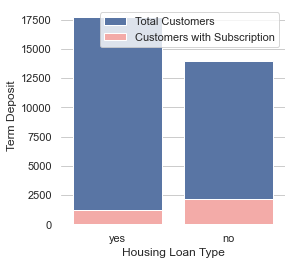

In [333]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Housing Loan Type", data=housing_loan_df,label="Total Customers", color="b")
sns.set_color_codes("pastel")
sns.barplot(y="Term Deposit", x="Housing Loan Type", data=housing_loan_df, label="Customers with Subscription", color="r")


# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('Housing.png')

<b> Recommendations </b>

1. Customers which have not taken housing loan are more likely to subscribe. Graph shows customers with housing loan were approached more, but focus should be changed to customers without Housing Loan. 

#### Personal Loan 
1. 149 Missing values

In [334]:
train.personal_loan.isna().sum()

149

In [335]:
personal_loan_ = list(train.personal_loan.value_counts().index)
personal_loan_count = [train.personal_loan.value_counts()[i] for i in range(len(train.personal_loan.value_counts()))]
personal_loan_percent = [round(100*train.personal_loan.value_counts()[i]/train.shape[0],2) for i in range(len(train.personal_loan.value_counts()))]

yes_personal_loan = train[train.term_deposit_subscribed == 1]
personal_loan_yes_dep = [yes_personal_loan.personal_loan.value_counts()[i] for i in range(len(yes_personal_loan.personal_loan.value_counts()))]
personal_loan_df = pd.DataFrame({'Personal Loan Type': personal_loan_,'Count' : personal_loan_count,'Percentage' : personal_loan_percent,'Yes': personal_loan_yes_dep})
personal_loan_df

,Personal Loan Type,Count,Percentage,Yes
0,no,26463,83.62,3075
1,yes,5035,15.91,304


In [336]:
pl = train[train.term_deposit_subscribed == 1]
pl.personal_loan.value_counts()

no     3075
yes     304
Name: personal_loan, dtype: int64

In [337]:
train[train.term_deposit_subscribed == 0].personal_loan.value_counts()

no     23388
yes     4731
Name: personal_loan, dtype: int64

In [338]:
pl0 = train[train.term_deposit_subscribed == 0].personal_loan.mode()
pl0[0]

'no'

In [339]:
train[train.term_deposit_subscribed == 0].personal_loan.isna().sum()

134

In [340]:
train[train.term_deposit_subscribed == 1].personal_loan.value_counts()

no     3075
yes     304
Name: personal_loan, dtype: int64

In [341]:
train[train.term_deposit_subscribed == 1].personal_loan.isna().sum()

15

In [342]:
pl1 = train[train.term_deposit_subscribed == 1].personal_loan.mode()
pl1[0]

'no'

In [343]:
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.personal_loan[i]) == True:
        train.personal_loan[i] = pl0[0]
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.personal_loan[i]) == True:
        train.personal_loan[i] = pl1[0]

<ipython-input-343-2df9378da2a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.personal_loan[i] = pl0[0]
<ipython-input-343-2df9378da2a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.personal_loan[i] = pl1[0]


In [344]:
train.personal_loan.isna().sum()

0

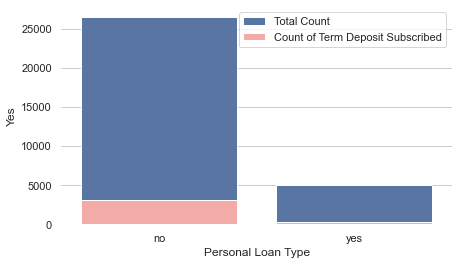

In [345]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Personal Loan Type", data=personal_loan_df,label="Total Count", color="b")
sns.set_color_codes("pastel")
sns.barplot(y="Yes", x="Personal Loan Type", data=personal_loan_df, label="Count of Term Deposit Subscribed", color="r")


# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('Personal.png')

#### Reccomendations
1. Customers without personal loan are more likely to subscribe and they have been approached. 

####  Communication Type
1. 0 Missing Values. Unknown category accounts for 29% of the observations which is a very large number so we will consider it as a valide category in our analysis

In [346]:
train.communication_type.isna().sum()

0

In [347]:
communication_type_ = list(train.communication_type.value_counts().index)
communication_type_count = [train.communication_type.value_counts()[i] for i in range(len(train.communication_type.value_counts()))]
communication_type_percent = [round(100*train.communication_type.value_counts()[i]/train.shape[0],2) for i in range(len(train.communication_type.value_counts()))]

yes_communication_type = train[train.term_deposit_subscribed == 1]
communication_type_yes_dep = [yes_communication_type.communication_type.value_counts()[i] for i in range(len(yes_communication_type.communication_type.value_counts()))]
communication_type_df = pd.DataFrame({'Communication Type': communication_type_,'Count' : communication_type_count,'Percentage' : communication_type_percent,'Yes': communication_type_yes_dep})
communication_type_df

,Communication Type,Count,Percentage,Yes
0,cellular,20480,64.71,2808
1,unknown,9151,28.92,328
2,telephone,2016,6.37,258


In [348]:
ct = train[train.term_deposit_subscribed == 1]
ct.communication_type.value_counts()

cellular     2808
unknown       328
telephone     258
Name: communication_type, dtype: int64

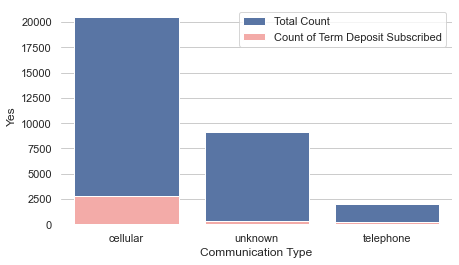

In [349]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Communication Type", data=communication_type_df,label="Total Count", color="b")
sns.set_color_codes("pastel")
sns.barplot(y="Yes", x="Communication Type", data=communication_type_df, label="Count of Term Deposit Subscribed", color="r")


# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('comm.png')

#### Inference
Communcation done via cellular is more likely to engage customer and get term deposit subscription. 

#### Month 

In [350]:
train.month.isna().sum()

0

In [351]:
month_ = list(train.month.value_counts().index)
month_count = [train.month.value_counts()[i] for i in range(len(train.month.value_counts()))]
month_percent = [round(100*train.month.value_counts()[i]/train.shape[0],2) for i in range(len(train.month.value_counts()))]

month_df = pd.DataFrame({'Month': month_,'Count' : month_count,'Percentage' : month_percent})
month_df

,Month,Count,Percentage
0,may,9685,30.60
1,jul,4786,15.12
2,aug,4308,13.61
3,jun,3746,11.84
4,nov,2801,8.85
5,apr,2111,6.67
6,feb,1836,5.80
7,jan,953,3.01
8,oct,510,1.61
9,sep,417,1.32


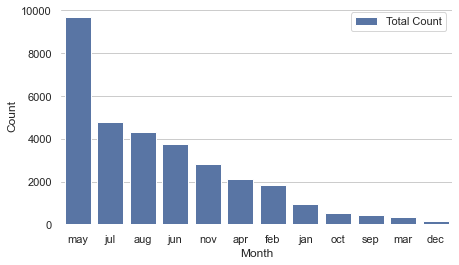

In [352]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Month", data=month_df,label="Total Count", color="b")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('month.png')

In [353]:
m = train[train.term_deposit_subscribed == 1]
m_name = list(m.month.value_counts().index)
m_yes = [m.month.value_counts()[i] for i in range(len(m.month.value_counts().value_counts()))]
m_df = pd.DataFrame({'month': m_name,'Count' : m_yes})
m_df

,month,Count
0,may,577
1,aug,415
2,jul,381
3,apr,374
4,jun,361
5,feb,284
6,nov,261
7,oct,218
8,sep,195
9,mar,174


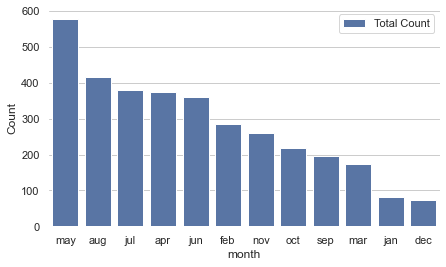

In [354]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="month", data=m_df,label="Total Count", color="b")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

#### Previous Campaign Outcome 

In [355]:
train.prev_campaign_outcome.isna().sum()

0

In [356]:
prev_campaign_outcome_ = list(train.prev_campaign_outcome.value_counts().index)
prev_campaign_outcome_count = [train.prev_campaign_outcome.value_counts()[i] for i in range(len(train.prev_campaign_outcome.value_counts()))]
prev_campaign_outcome_percent = [round(100*train.prev_campaign_outcome.value_counts()[i]/train.shape[0],2) for i in range(len(train.prev_campaign_outcome.value_counts()))]


prev_campaign_outcome_df = pd.DataFrame({'Prev Campaign Outcome': prev_campaign_outcome_,'Count' : prev_campaign_outcome_count,'Percentage' : prev_campaign_outcome_percent})
prev_campaign_outcome_df

,Prev Campaign Outcome,Count,Percentage
0,unknown,25833,81.63
1,failure,3472,10.97
2,other,1272,4.02
3,success,1070,3.38


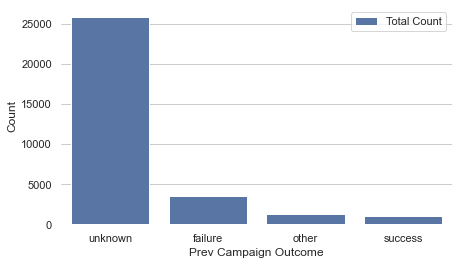

In [357]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Prev Campaign Outcome", data=prev_campaign_outcome_df,label="Total Count", color="b")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('pre camp out 1.png')

In [358]:
pco = train[train.term_deposit_subscribed == 1]
pco_name = list(pco.prev_campaign_outcome.value_counts().index)
pco_yes = [pco.prev_campaign_outcome.value_counts()[i] for i in range(len(pco.prev_campaign_outcome.value_counts().value_counts()))]
pco_df = pd.DataFrame({'Prev Outcome': pco_name,'Count' : pco_yes})
pco_df

,Prev Outcome,Count
0,unknown,2102
1,success,712
2,failure,394
3,other,186


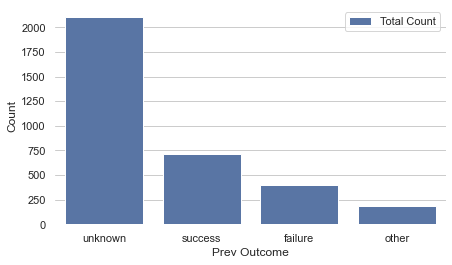

In [359]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(y="Count", x="Prev Outcome", data=pco_df,label="Total Count", color="b")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig('pre camp out 2.png')

#### Reccomendation



####  Balance

In [360]:
train.balance.isna().sum()

399

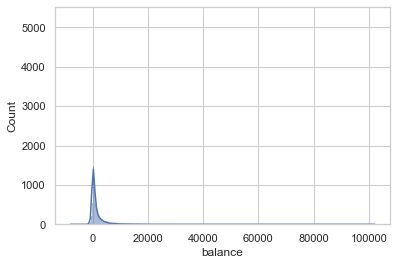

In [361]:
# Plot histogram of customer_age
sns.histplot(data=train, x="balance", kde=True)
plt.show()

In [362]:
train.balance.describe()

count     31248.000000
mean       1368.112615
std        3085.342417
min       -8020.000000
25%          72.000000
50%         449.000000
75%        1413.000000
max      102128.000000
Name: balance, dtype: float64

In [363]:
print('Minimum age: ', train.balance.min())
print('Maximum age: ',train.balance.max())
print('Mean value: ', train.balance.mean())
print('Median value: ',train.balance.median())
print('Standard deviation: ', train.balance.std())
print('Null values: ',train.balance.isnull().sum())

Minimum age:  -8020.0
Maximum age:  102128.0
Mean value:  1368.1126152073732
Median value:  449.0
Standard deviation:  3085.342416503875
Null values:  399


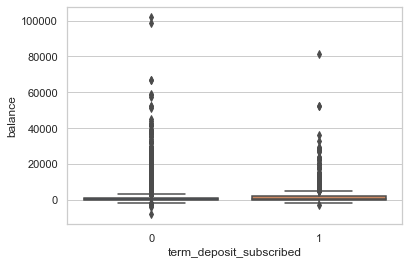

In [364]:
sns.boxplot(x="term_deposit_subscribed", y="balance", data=train)
plt.show()

In [365]:
# cap outliers of this values. Mostly values more than 70 years old are removed.
# Area between quantile 0.25 and 0.75 doesn’t change too much after this operation.
# write code for Box-plots of customer_age age with and without outliers.
# How to remove outliers
# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [366]:
# Quartiles
Q1=train.balance.quantile(q=0.25)
Q3=train.balance.quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  72.0
3st Quartile (Q3) is:  1413.0


In [367]:
# Outlier Detection from IQR
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages: ', L_outliers)
print('Upper outliers in Ages: ', U_outliers)

Lower outliers in Ages:  -1939.5
Upper outliers in Ages:  3424.5


In [368]:
print('Number of outliers in balance upper : ', train[train['balance']>3424.5]['balance'].count())
print('Number of outliers in balance lower : ', train[train['balance']<-1939.5]['balance'].count())
print('% of Outlier in balance upper: ',round(train[train['balance']>3424.5]['balance'].count()*100/len(train),2), '%')
print('% of Outlier in balance lower: ',round(train[train['balance']<-1939.5]['balance'].count()*100/len(train),2), '%')

Number of outliers in balance upper :  3299
Number of outliers in balance lower :  10
% of Outlier in balance upper:  10.42 %
% of Outlier in balance lower:  0.03 %


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


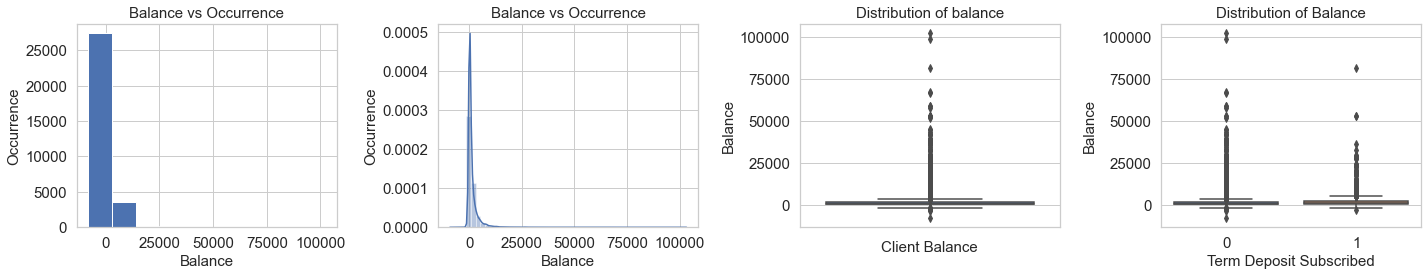

In [369]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['balance'])
ax1.set_xlabel('Balance', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Balance vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='balance',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Balance', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of balance', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="balance", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Balance', fontsize=15)
ax4.set_title('Distribution of Balance', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('balance before outlier and missing.png')

C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


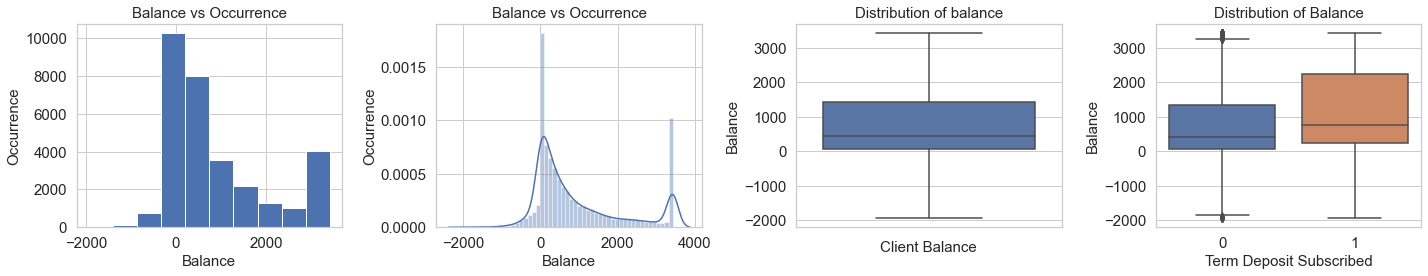

In [370]:
train.loc[train.balance > 3424.5,['balance']] = 3424.5
train.loc[train.balance < -1939.5,['balance']] = -1939.5
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['balance'])
ax1.set_xlabel('Balance', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Balance vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='balance',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Balance', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of balance', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="balance", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Balance', fontsize=15)
ax4.set_title('Distribution of Balance', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [371]:
bal0 = train[train.term_deposit_subscribed == 0].balance.median()
bal0

418.0

In [372]:
bal1 = train[train.term_deposit_subscribed == 1].balance.median()
bal1

763.0

Yes


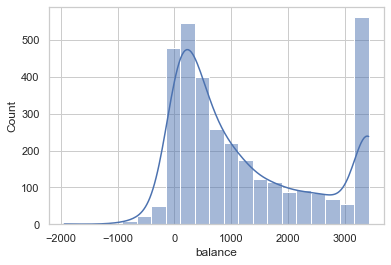

No


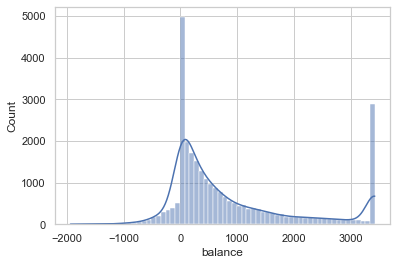

In [373]:
# Plot histogram of customer_age
print('Yes')
sns.histplot(data=train[train.term_deposit_subscribed == 1], x="balance", kde=True)
plt.show()

print('No')
# Plot histogram of customer_age
sns.histplot(data=train[train.term_deposit_subscribed == 0], x="balance", kde=True)
plt.show()

In [374]:
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.balance[i]) == True:
        train.balance[i] = bal0
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.balance[i]) == True:
        train.balance[i] = bal1

<ipython-input-374-a9419eed2f3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.balance[i] = bal0
<ipython-input-374-a9419eed2f3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.balance[i] = bal1


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


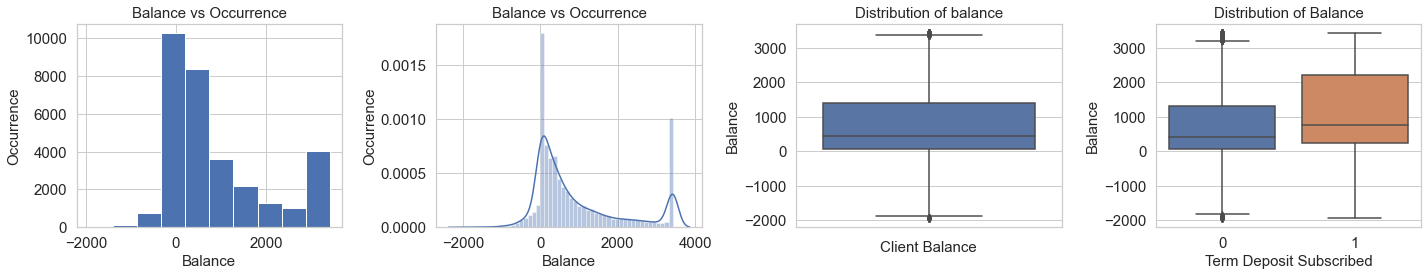

In [375]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['balance'])
ax1.set_xlabel('Balance', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Balance vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='balance',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Balance', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of balance', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="balance", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Balance', fontsize=15)
ax4.set_title('Distribution of Balance', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [376]:
# Quartiles
Q1=train.balance.quantile(q=0.25)
Q3=train.balance.quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  75.0
3st Quartile (Q3) is:  1394.0


In [377]:
# Outlier Detection from IQR
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in balance: ', L_outliers)
print('Upper outliers in balance: ', U_outliers)

Lower outliers in balance:  -1903.5
Upper outliers in balance:  3372.5


In [378]:
print('Number of outliers in balance upper : ', train[train['balance']>3372.5]['balance'].count())
print('Number of outliers in balance lower : ', train[train['balance']<-1903.5]['balance'].count())
print('% of Outlier in balance upper: ',round(train[train['balance']>3372.5]['balance'].count()*100/len(train),2), '%')
print('% of Outlier in balance lower: ',round(train[train['balance']<-1903.5]['balance'].count()*100/len(train),2), '%')

Number of outliers in balance upper :  3370
Number of outliers in balance lower :  11
% of Outlier in balance upper:  10.65 %
% of Outlier in balance lower:  0.03 %


#### <font color='red'> Outlier should not be treated as Missing Value </font>

C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


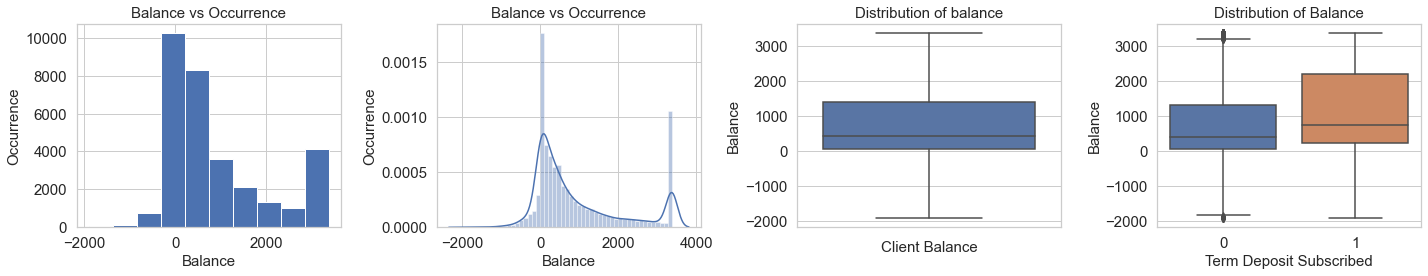

In [379]:
train.loc[train.balance > 3372.5,['balance']] = 3372.5
train.loc[train.balance < -1903.5,['balance']] = -1903.5
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['balance'])
ax1.set_xlabel('Balance', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Balance vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='balance',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Balance', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of balance', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="balance", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Balance', fontsize=15)
ax4.set_title('Distribution of Balance', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('balance after outlier and missing.png')

####  days_since_prev_campaign_contact 

In [380]:
(train.days_since_prev_campaign_contact.isna().sum()/train.shape[0])*100 # 82% values are missing so drop this column
train.drop('days_since_prev_campaign_contact',1,inplace = True)

####  day_of_month

In [381]:
train.day_of_month.isna().sum()

0

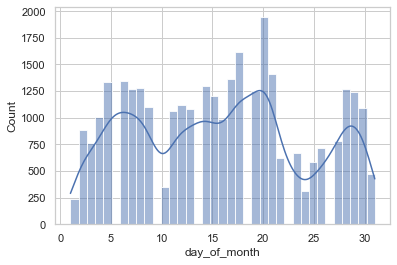

In [382]:
sns.histplot(data=train, x="day_of_month", kde=True)
plt.show()

####  Last_contact_duration 

In [383]:
train.last_contact_duration.isna().sum()

311

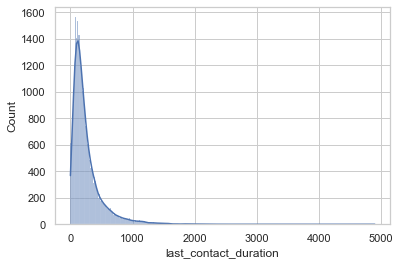

In [384]:
# Plot histogram of customer_age
sns.histplot(data=train, x="last_contact_duration", kde=True)
plt.show()

In [385]:
print('Minimum duration calls in seconds: ', train['last_contact_duration'].min())
print('Maximum duration calls in seconds: ',train['last_contact_duration'].max())
print('Mean duration calls in seconds: ', train['last_contact_duration'].mean())
print('Median duration calls in seconds: ',train['last_contact_duration'].median())
print('Standard deviation: ', train['last_contact_duration'].std())
print('Null values: ',train['last_contact_duration'].isnull().any())

Minimum duration calls in seconds:  0.0
Maximum duration calls in seconds:  4900.0
Mean duration calls in seconds:  256.184037528721
Median duration calls in seconds:  179.0
Standard deviation:  256.1814791048239
Null values:  True


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


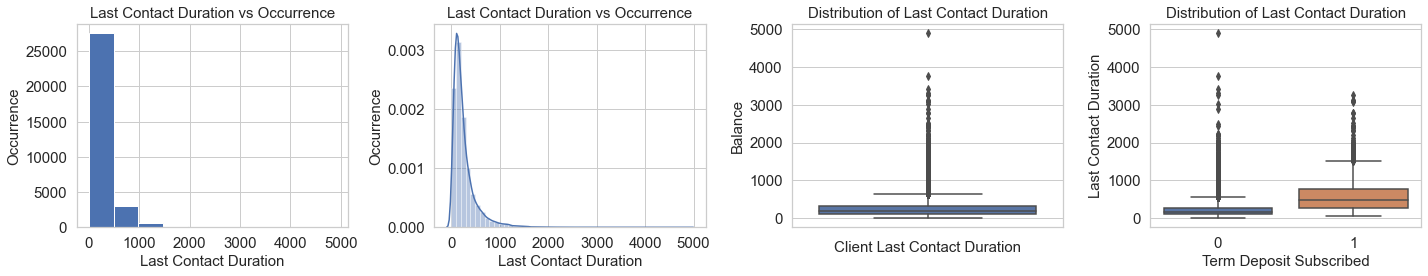

In [386]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['last_contact_duration'])
ax1.set_xlabel('Last Contact Duration', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['last_contact_duration'],ax=ax2)
ax2.set_xlabel('Last Contact Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='last_contact_duration',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Last Contact Duration', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of Last Contact Duration', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="last_contact_duration", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Last Contact Duration', fontsize=15)
ax4.set_title('Distribution of Last Contact Duration', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('Last Call before outlier and missing.png')

In [387]:
Q1=train['last_contact_duration'].quantile(q=0.25)
Q3=train['last_contact_duration'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  103.0
3st Quartile (Q3) is:  315.25


In [388]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -215.375
Upper outliers in Duration:  633.625


In [389]:
print('Number of outliers in last_contact_duration upper : ', train[train['last_contact_duration']>633.625]['last_contact_duration'].count())
print('Number of outliers in Balance lower : ', train[train['last_contact_duration']<-215.375]['last_contact_duration'].count())
print('% of Outlier in last_contact_duration upper: ',round(train[train['last_contact_duration']>633.625]['last_contact_duration'].count()*100/len(train),2), '%')
print('% of Outlier in last_contact_duration lower: ',round(train[train['last_contact_duration']<-215.375]['last_contact_duration'].count()*100/len(train),2), '%')

Number of outliers in last_contact_duration upper :  2289
Number of outliers in Balance lower :  0
% of Outlier in last_contact_duration upper:  7.23 %
% of Outlier in last_contact_duration lower:  0.0 %


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


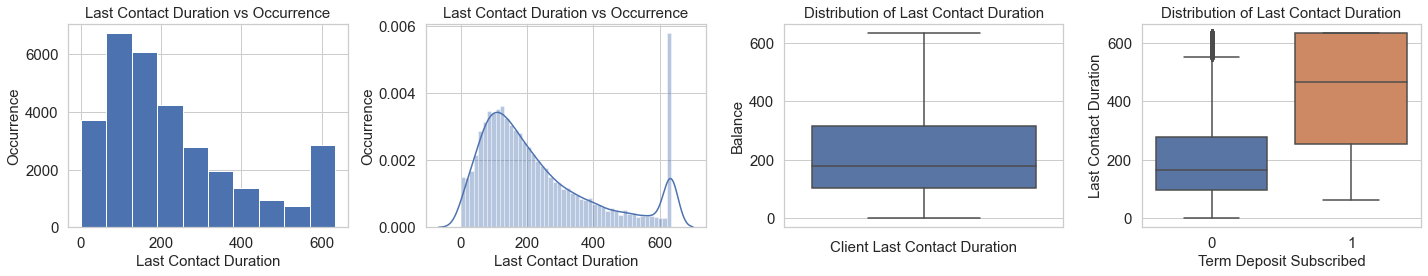

In [390]:
train.loc[train.last_contact_duration > 633.625,['last_contact_duration']] = 633.625
train.loc[train.last_contact_duration < -215.375,['last_contact_duration']] = -215.375
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['last_contact_duration'])
ax1.set_xlabel('Last Contact Duration', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['last_contact_duration'],ax=ax2)
ax2.set_xlabel('Last Contact Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='last_contact_duration',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Last Contact Duration', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of Last Contact Duration', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="last_contact_duration", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Last Contact Duration', fontsize=15)
ax4.set_title('Distribution of Last Contact Duration', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [391]:
last0 = train[train.term_deposit_subscribed == 0].last_contact_duration.median()
last0

164.0

In [392]:
last1 = train[train.term_deposit_subscribed == 1].last_contact_duration.median()
last1

465.0

Yes


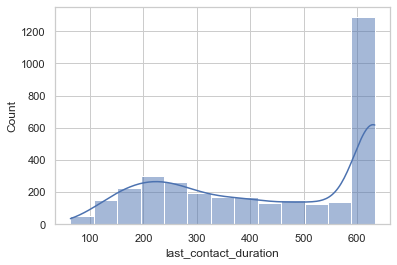

No


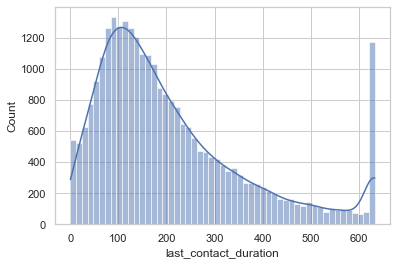

In [393]:
# Plot histogram of customer_age
print('Yes')
sns.histplot(data=train[train.term_deposit_subscribed == 1], x="last_contact_duration", kde=True)
plt.show()

print('No')
# Plot histogram of customer_age
sns.histplot(data=train[train.term_deposit_subscribed == 0], x="last_contact_duration", kde=True)
plt.show()

In [394]:
for i in range(train.shape[0]):
    if train.term_deposit_subscribed[i] == 0 and pd.isna(train.last_contact_duration[i]) == True:
        train.last_contact_duration[i] = last0
    elif train.term_deposit_subscribed[i] == 1 and pd.isna(train.last_contact_duration[i]) == True:
        train.last_contact_duration[i] = last1

<ipython-input-394-1719afb40881>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.last_contact_duration[i] = last1
<ipython-input-394-1719afb40881>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.last_contact_duration[i] = last0


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


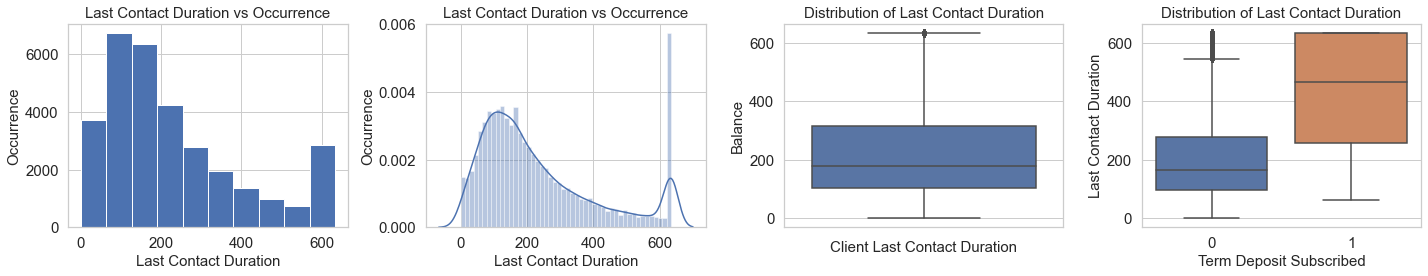

In [395]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,4))

#histogram
ax1.hist(train['last_contact_duration'])
ax1.set_xlabel('Last Contact Duration', fontsize=15)
ax1.set_ylabel('Occurrence', fontsize=15)
ax1.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(train['last_contact_duration'],ax=ax2)
ax2.set_xlabel('Last Contact Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Last Contact Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#boxplot
sns.boxplot(y='last_contact_duration',data=train,orient='v',ax=ax3)
ax3.set_xlabel('Client Last Contact Duration', fontsize=15)
ax3.set_ylabel('Balance', fontsize=15)
ax3.set_title('Distribution of Last Contact Duration', fontsize=15)
ax3.tick_params(labelsize=15)

sns.boxplot(x="term_deposit_subscribed", y="last_contact_duration", data=train, ax = ax4)
ax4.set_xlabel('Term Deposit Subscribed', fontsize=15)
ax4.set_ylabel('Last Contact Duration', fontsize=15)
ax4.set_title('Distribution of Last Contact Duration', fontsize=15)
ax4.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.savefig('Last call after outlier and missing.png')

####  num_contacts_in_campaign

In [396]:
train.num_contacts_in_campaign.isna().sum()

112

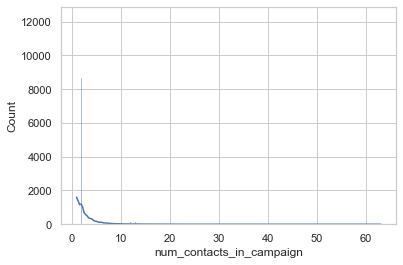

In [397]:
# Plot histogram of customer_age
sns.histplot(data=train, x="num_contacts_in_campaign", kde=True)
plt.show()

In [398]:
train.num_contacts_in_campaign.value_counts().to_dict()

{1.0: 12270,
 2.0: 8678,
 3.0: 3845,
 4.0: 2437,
 5.0: 1256,
 6.0: 871,
 7.0: 524,
 8.0: 374,
 9.0: 235,
 10.0: 188,
 11.0: 145,
 12.0: 112,
 13.0: 110,
 14.0: 57,
 16.0: 56,
 15.0: 54,
 17.0: 53,
 20.0: 32,
 19.0: 31,
 18.0: 30,
 21.0: 21,
 25.0: 19,
 23.0: 16,
 24.0: 15,
 28.0: 13,
 22.0: 13,
 29.0: 12,
 26.0: 9,
 32.0: 8,
 31.0: 7,
 27.0: 7,
 30.0: 6,
 33.0: 5,
 34.0: 4,
 38.0: 3,
 43.0: 3,
 35.0: 3,
 36.0: 3,
 37.0: 2,
 41.0: 2,
 63.0: 1,
 46.0: 1,
 44.0: 1,
 55.0: 1,
 51.0: 1,
 58.0: 1}

In [399]:
train[train.term_deposit_subscribed == 1].num_contacts_in_campaign.value_counts().to_dict()
# Laplace smoothening

{1.0: 1637,
 2.0: 891,
 3.0: 413,
 4.0: 191,
 5.0: 93,
 6.0: 52,
 7.0: 30,
 8.0: 20,
 9.0: 14,
 11.0: 12,
 10.0: 7,
 13.0: 6,
 17.0: 4,
 15.0: 3,
 16.0: 2,
 12.0: 1,
 21.0: 1,
 24.0: 1,
 14.0: 1,
 20.0: 1}

In [400]:
N = train[train.term_deposit_subscribed == 1].shape[0]
alpha = 1
d = len(train.num_contacts_in_campaign.unique())

In [401]:
train[train.term_deposit_subscribed == 1].num_contacts_in_campaign.isna().sum()

14

In [402]:
# Drop rows with missings num_contacts_in_campaign
train = train[pd.isna(train.num_contacts_in_campaign) == False]
train.num_contacts_in_campaign.isna().sum()

0

####  num_contacts_prev_campaign

In [403]:
train.num_contacts_prev_campaign.isna().sum()

0

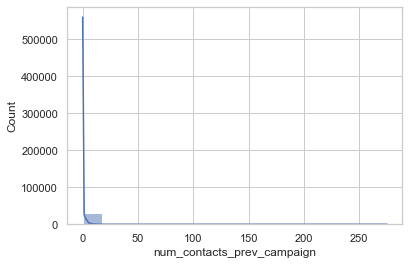

In [404]:
sns.histplot(data=train, x="num_contacts_prev_campaign", kde=True)
plt.show()

In [405]:
train.num_contacts_prev_campaign.value_counts()
# Laplace transformation

0      25742
1       1929
2       1501
3        803
4        500
5        311
6        187
7        146
8         90
9         62
10        48
11        46
12        34
13        27
14        15
15        14
17        11
19         7
20         7
16         6
23         6
22         5
18         5
25         4
27         4
24         4
29         3
30         3
37         2
21         2
40         1
41         1
38         1
26         1
58         1
35         1
32         1
55         1
28         1
275        1
51         1
Name: num_contacts_prev_campaign, dtype: int64

### Missing value imputation 

We have two object variables marital(trichotomous) and personal_loan(trichotomous) for missing value imputation 
and in numerical category customer_age, balance, last_contact_duration, num_contacts_in_campaign and days_since_prev_campaign_contact. 

Step 1:- Find correlation between
1. numeric to numeric: If the relationship is linear then Karl Pearson's, link is shared below
2. numeric to nominal:- Boxplot
3. numeric to ordinal :- Boxplot 
4. nominal to nominal :- Chi-square test https://www.analyticsvidhya.com/blog/2019/11/what-is-chi-square-test-how-it-works/
5. nominal to ordinal :- chi-square test
6. ordinal to ordinal :- chi-square test

Step 2:- Impute the missing value with highest correlation. 

We are not interested in imputed the missing value using the mean, median or mode. Since the datatset it imbalanced, then there are very high chances that we will induce error in the dataset if adopted this strategy of imputation because majority of the samples points are representing major class and imputing those values in minor would definitely lead to add on of hidden and unignorable garbage within the dataset

### Dummy Variable Encoding

In [406]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31535 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                31535 non-null  float64
 1   job_type                    31535 non-null  object 
 2   marital                     31535 non-null  object 
 3   education                   31535 non-null  object 
 4   default                     31535 non-null  object 
 5   balance                     31535 non-null  float64
 6   housing_loan                31535 non-null  object 
 7   personal_loan               31535 non-null  object 
 8   communication_type          31535 non-null  object 
 9   day_of_month                31535 non-null  int64  
 10  month                       31535 non-null  object 
 11  last_contact_duration       31535 non-null  float64
 12  num_contacts_in_campaign    31535 non-null  float64
 13  num_contacts_prev_campaign  315

In [407]:
train1 = pd.get_dummies(data=train, columns=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], drop_first = False)

In [408]:
train1.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed', 'job_type_admin.', 'job_type_blue-collar',
       'job_type_entrepreneur', 'job_type_housemaid', 'job_type_management',
       'job_type_retired', 'job_type_self-employed', 'job_type_services',
       'job_type_student', 'job_type_technician', 'job_type_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_loan_no', 'housing_loan_yes',
       'personal_loan_no', 'personal_loan_yes', 'communication_type_cellular',
       'communication_type_telephone', 'communication_type_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'prev_campaign_outcome

### Model Building

In [409]:
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

#Import SMOTE library for handling imbalance class
from imblearn.over_sampling import SMOTE

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 

#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics

#Import the Voting classifier for Ensemble
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import f1_score

In [410]:
#independent and dependent variables
X=train1.loc[:,train1.columns!='term_deposit_subscribed']
y=train1.loc[:,train1.columns=='term_deposit_subscribed']

In [411]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

In [412]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option                             
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100 )
#Fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [413]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                    Imp
customer_age                   0.082711
balance                        0.088909
day_of_month                   0.089606
last_contact_duration          0.290298
num_contacts_in_campaign       0.026225
num_contacts_prev_campaign     0.018182
job_type_admin.                0.005826
job_type_blue-collar           0.005560
job_type_entrepreneur          0.003945
job_type_housemaid             0.002245
job_type_management            0.006671
job_type_retired               0.002544
job_type_self-employed         0.004809
job_type_services              0.003715
job_type_student               0.005238
job_type_technician            0.007992
job_type_unemployed            0.004469
marital_divorced               0.003664
marital_married                0.007930
marital_single                 0.004071
education_primary              0.003531
education_secondary            0.005332
education_tertiary             0.007180
default_no                     0.000468


In [414]:
#Making the prediction
y_predict = dt_model.predict(X_test)

In [415]:
# performance on train data
print('Performance on Training data using DT: ',dt_model.score(X_train , y_train))
# performance on test data
print('Performance on Testing data using DT: ',dt_model.score(X_test , y_test))

Performance on Training data using DT:  1.0
Performance on Testing data using DT:  0.8953598985308107


There is a overfitting in the model as the dataset is performing 100% accurately in trainnig data. However, the accuracy of the testing data drops.

In [416]:
#Evaluate the model using accuracy, confusion metrix, and classification report
acc_DT=metrics.accuracy_score(y_test, y_predict)
print('Accuracy DT: ',acc_DT)
print('Confusion Matrix DT: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report DT: \n',metrics.classification_report(y_test, y_predict)) 
print('Binary F1-Score DT:',f1_score(y_test, y_predict, average='binary'))
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)

Accuracy DT:  0.8953598985308107
Confusion Matrix DT: 
 [[7951  486]
 [ 504  520]]
Classification report DT: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      8437
           1       0.52      0.51      0.51      1024

    accuracy                           0.90      9461
   macro avg       0.73      0.73      0.73      9461
weighted avg       0.89      0.90      0.89      9461

Binary F1-Score DT: 0.5123152709359606


So using Decision Tree Model, we got accuracy of 8444/9461 = 89% and 11% as misclassification error.

In [417]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'Binary F1 Score': binary_f1},index={'1'})
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5123


In [418]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7,random_state=100,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=100)

In [419]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                    Imp
customer_age                   0.082711
balance                        0.088909
day_of_month                   0.089606
last_contact_duration          0.290298
num_contacts_in_campaign       0.026225
num_contacts_prev_campaign     0.018182
job_type_admin.                0.005826
job_type_blue-collar           0.005560
job_type_entrepreneur          0.003945
job_type_housemaid             0.002245
job_type_management            0.006671
job_type_retired               0.002544
job_type_self-employed         0.004809
job_type_services              0.003715
job_type_student               0.005238
job_type_technician            0.007992
job_type_unemployed            0.004469
marital_divorced               0.003664
marital_married                0.007930
marital_single                 0.004071
education_primary              0.003531
education_secondary            0.005332
education_tertiary             0.007180
default_no                     0.000468


In [420]:
y_predict = reg_dt_model.predict(X_test)

In [421]:
# performance on train data
print('Performance on Training data using  Pruned DT: ',reg_dt_model.score(X_train , y_train))
# performance on test data
print('Performance on Testing data using  Pruned DT: ',reg_dt_model.score(X_test , y_test))

Performance on Training data using  Pruned DT:  0.9209024191356346
Performance on Testing data using  Pruned DT:  0.9078321530493605


In [422]:
#Evaluate the model using accuracy, confusion metrix, and classification report
acc_pruned_DT=metrics.accuracy_score(y_test, y_predict)
print("Accuracy Pruned DT:",acc_pruned_DT)
print('Confusion Matrix Pruned DT: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report Pruned DT: \n',metrics.classification_report(y_test, y_predict)) 
print('Binary F1-Score DT:',f1_score(y_test, y_predict, average='binary'))
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)

Accuracy Pruned DT: 0.9078321530493605
Confusion Matrix Pruned DT: 
 [[8159  278]
 [ 594  430]]
Classification report Pruned DT: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8437
           1       0.61      0.42      0.50      1024

    accuracy                           0.91      9461
   macro avg       0.77      0.69      0.72      9461
weighted avg       0.90      0.91      0.90      9461

Binary F1-Score DT: 0.4965357967667436


1. So using the Regularized Decision Tree Model, we got accuracy of 12154/13564 = approx. 91% and 9% as misclassification error.
2. When the tree is reguralized and overfitting is reduced there is a improvement in accuracy.

In [423]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'Binary F1 Score': [binary_f1]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5123
2,Pruned Decision Tree,0.4965


In [424]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=100)
rfcl = rfcl.fit(X_train, y_train)

<ipython-input-424-2ebde7ccc50a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl = rfcl.fit(X_train, y_train)


In [425]:
y_predict = rfcl.predict(X_test)
acc_RF=metrics.accuracy_score(y_test , y_predict)
print('Accuracy using Random forest: ',acc_RF)
print('Confusion Matrix Random Forest: \n',metrics.confusion_matrix(y_test, y_predict))
print('Binary F1-Score DT:',f1_score(y_test, y_predict, average='binary'))
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)

Accuracy using Random forest:  0.9116372476482402
Confusion Matrix Random Forest: 
 [[8231  206]
 [ 630  394]]
Binary F1-Score DT: 0.4852216748768472


In [426]:
binary_f1

0.4852

In [427]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Binary F1 Score': [binary_f1]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5123
2,Pruned Decision Tree,0.4965
3,Random Forest,0.4852


### 4. Ensemble Learning - Bagging

In [428]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=100,random_state=100)
bgcl = bgcl.fit(X_train, y_train)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [429]:
y_predict = bgcl.predict(X_test)
acc_bg=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using Bagging: ',acc_bg)
print('Confusion Matrix using Bagging: \n',metrics.confusion_matrix(y_test, y_predict))
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using Bagging:  0.9056125145333475
Confusion Matrix using Bagging: 
 [[8100  337]
 [ 556  468]]
Binary F1-Score DT: 0.5118


In [430]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'Binary F1 Score': [binary_f1]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5123
2,Pruned Decision Tree,0.4965
3,Random Forest,0.4852
4,Bagging,0.5118


### 5. Ensemble Learning - AdaBoosting

In [431]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=100,random_state=100)
abcl = abcl.fit(X_train, y_train)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [432]:
y_predict = abcl.predict(X_test)
acc_AB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using AdaBoosting: ',acc_AB)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using AdaBoosting:  0.8965225663249128
Confusion Matrix: 
 [[7956  481]
 [ 498  526]]
Binary F1-Score DT: 0.518


In [433]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'Binary F1 Score': [binary_f1]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5123
2,Pruned Decision Tree,0.4965
3,Random Forest,0.4852
4,Bagging,0.5118
5,AdaBoosting,0.5180


### 6. Ensemble Learning - GradientBoost

In [434]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=100)
gbcl = gbcl.fit(X_train, y_train)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [435]:
y_predict = gbcl.predict(X_test)
acc_GB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using GradientBoosting: ',acc_GB)
print('Confusion Matrix using GradientBoosting: \n',metrics.confusion_matrix(y_test, y_predict))
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using GradientBoosting:  0.9126942183701512
Confusion Matrix using GradientBoosting: 
 [[8257  180]
 [ 646  378]]
Binary F1-Score DT: 0.4779


In [436]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoosting'], 'Binary F1 Score': [binary_f1]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5123
2,Pruned Decision Tree,0.4965
3,Random Forest,0.4852
4,Bagging,0.5118
5,AdaBoosting,0.5180
6,GradientBoosting,0.4779


### 7. Ensemble Logistic Regression, Naive Bayes, Decision Tree

In [437]:
#Multiple model Ensemble
from sklearn import svm
LR=LogisticRegression()
NB=GaussianNB()
#DT=DecisionTreeClassifier()  ('DT',DT),
SVM=svm.SVC() 

In [438]:
evc=VotingClassifier(estimators=[('LR',LR),('NB',NB),('SVM',SVM)],voting='hard')

In [439]:
evc.fit(X_train,y_train)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\satya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression()), ('NB', GaussianNB()),
                             ('SVM', SVC())])

In [440]:
y_predict = evc.predict(X_test)
#evc.score(X_test,y_test)

In [441]:
acc_Ensemble=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using Ensemble: ',acc_Ensemble)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using Ensemble:  0.9012789345735123
Confusion Matrix: 
 [[8342   95]
 [ 839  185]]
Binary F1-Score DT: 0.2837


In [442]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'Binary F1 Score': [binary_f1]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5123
2,Pruned Decision Tree,0.4965
3,Random Forest,0.4852
4,Bagging,0.5118
5,AdaBoosting,0.5180
6,GradientBoosting,0.4779
7,Ensemble,0.2837


* Decision Tree, Bagging, AdaBoosting giving the highest accuracy. But these models will be biased towards the customers who do not have subscribed term deposit as there are 28154 customers who do not have subscribed term deposit. There are only 3380 customers who have subscribed term deposit. So, these results can't be genralized.

## 5. Model Building: Managing Imbalance the Target column and normalizing the columns

In [443]:
#independent and dependent variables
train_new=train1
X=train_new.loc[:,train_new.columns!='term_deposit_subscribed']
y=train_new.loc[:,train_new.columns=='term_deposit_subscribed']

In [444]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

## Normalizing/Scaling the Columns

In [445]:
#for normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Managing Imbalance classes

In [446]:
train1.groupby('term_deposit_subscribed').size()

term_deposit_subscribed
0    28155
1     3380
dtype: int64

In [447]:
y_train.value_counts()

term_deposit_subscribed
0                          19718
1                           2356
dtype: int64

In [448]:
#Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=0)
# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
ov_data_X,ov_data_y=Ov_sampling.fit_sample(X_train,y_train)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=columns)
ov_data_y=pd.DataFrame(ov_data_y,columns=['term_deposit_subscribed'])

In [449]:
print('length of oversampled data is   ',len(ov_data_X))
print('Number of no subscription in oversampled data ' ,len(ov_data_y[ov_data_y['term_deposit_subscribed']==0]))
print('Number of subscription ' ,len(ov_data_y[ov_data_y['term_deposit_subscribed']==1]))
print('Proportion of no subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['term_deposit_subscribed']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['term_deposit_subscribed']==1])/len(ov_data_X))

length of oversampled data is    39436
Number of no subscription in oversampled data  19718
Number of subscription  19718
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [450]:
ov_data_y['term_deposit_subscribed'].value_counts()

0    19718
1    19718
Name: term_deposit_subscribed, dtype: int64

### 1. Decision Tree Model

In [451]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option                             
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100 )
#Fitting the model
dt_model.fit(ov_data_X,ov_data_y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [452]:
#Making the prediction
y_predict = dt_model.predict(X_test)
#Evaluate the model using accuracy, confusion metrix, and classification report
acc_DT=metrics.accuracy_score(y_test, y_predict)
print('Accuracy DT: ',acc_DT)
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy DT:  0.8871155268999049
Binary F1-Score DT: 0.5154


In [453]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'Binary F1 Score': binary_f1},index={'1'})
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5154


### 2. Regularising/Pruning of Decision Tree

In [454]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7,random_state=100,min_samples_leaf=5)
reg_dt_model.fit(ov_data_X,ov_data_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=100)

In [455]:
y_predict = reg_dt_model.predict(X_test)
#Evaluate the model using accuracy, confusion metrix, and classification report
acc_pruned_DT=metrics.accuracy_score(y_test, y_predict)
print("Accuracy Pruned DT:",acc_pruned_DT)
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy Pruned DT: 0.8238029806574357
Binary F1-Score DT: 0.5172


In [456]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'Binary F1 Score': [binary_f1]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5154
2,Pruned Decision Tree,0.5172


### 3. Random Forest Classifier

In [457]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=100)
rfcl = rfcl.fit(ov_data_X,ov_data_y)

<ipython-input-457-9fb06dcc963e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl = rfcl.fit(ov_data_X,ov_data_y)


In [458]:
y_predict = rfcl.predict(X_test)
acc_RF=metrics.accuracy_score(y_test , y_predict)
print('Accuracy using Random forest: ',acc_RF)
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using Random forest:  0.9077264559771694
Binary F1-Score DT: 0.5659


In [459]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Binary F1 Score': [binary_f1]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5154
2,Pruned Decision Tree,0.5172
3,Random Forest,0.5659


### 4. Ensemble Learning - Bagging

In [460]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=100,random_state=100)
bgcl = bgcl.fit(ov_data_X,ov_data_y)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [461]:
y_predict = bgcl.predict(X_test)
acc_bg=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using Bagging: ',acc_bg)
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)


Accuracy using Bagging:  0.9029700877285699
Binary F1-Score DT: 0.597


<AxesSubplot:>

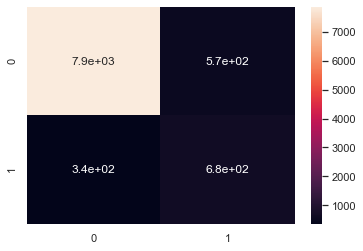

In [462]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True)

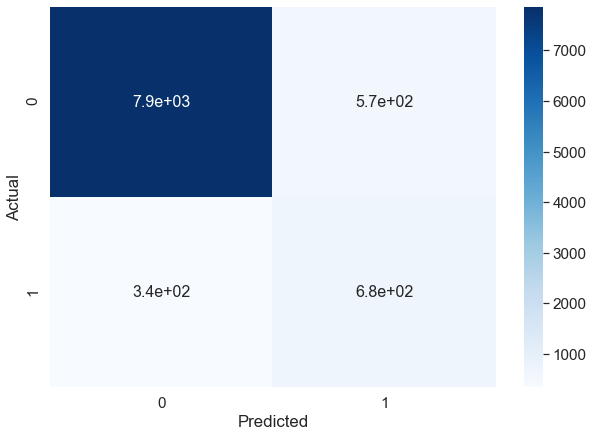

In [466]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# y_true = ["honda", "chevrolet", "honda", "toyota", "toyota", "chevrolet"]
# y_pred = ["honda", "chevrolet", "honda", "toyota", "toyota", "honda"]
data = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.savefig('Confusion Matrix.png')# font size

In [205]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'Binary F1 Score': [binary_f1]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5154
2,Pruned Decision Tree,0.5172
3,Random Forest,0.5659
4,Bagging,0.5970


### 5. Ensemble Learning - AdaBoosting

In [206]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=100,random_state=100)
abcl = abcl.fit(ov_data_X,ov_data_y)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [207]:
y_predict = abcl.predict(X_test)
acc_AB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using AdaBoosting: ',acc_AB)
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using AdaBoosting:  0.8848958883838918
Binary F1-Score DT: 0.5066


In [208]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'Binary F1 Score': [binary_f1]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5154
2,Pruned Decision Tree,0.5172
3,Random Forest,0.5659
4,Bagging,0.5970
5,AdaBoosting,0.5066


### 6. Ensemble Learning - GradientBoost

In [209]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=100)
gbcl = gbcl.fit(ov_data_X,ov_data_y)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [210]:
y_predict = gbcl.predict(X_test)
acc_GB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using GradientBoosting: ',acc_GB)
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using GradientBoosting:  0.8732692104428708
Binary F1-Score DT: 0.5847


In [211]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoosting'], 'Binary F1 Score': [binary_f1]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5154
2,Pruned Decision Tree,0.5172
3,Random Forest,0.5659
4,Bagging,0.5970
5,AdaBoosting,0.5066
6,GradientBoosting,0.5847


### 7. Ensemble Logistic Regression, Naive Bayes, SVM

In [212]:
#Multiple model Ensemble
from sklearn import svm
LR=LogisticRegression()
NB=GaussianNB()
#DT=DecisionTreeClassifier()  ('DT',DT),
SVM=svm.SVC() 

In [213]:
evc=VotingClassifier(estimators=[('LR',LR),('NB',NB),('SVM',SVM)],voting='hard')
evc.fit(ov_data_X,ov_data_y)

C:\Users\satya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('LR', LogisticRegression()), ('NB', GaussianNB()),
                             ('SVM', SVC())])

In [214]:
y_predict = evc.predict(X_test)
acc_Ensemble=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using Ensemble: ',acc_Ensemble)
binary_f1 = round(f1_score(y_test, y_predict, average='binary'),4)
print('Binary F1-Score DT:',binary_f1)

Accuracy using Ensemble:  0.8742204840925907
Binary F1-Score DT: 0.593


In [215]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'Binary F1 Score': [binary_f1]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Binary F1 Score']]
results

,Method,Binary F1 Score
1,Decision Tree,0.5154
2,Pruned Decision Tree,0.5172
3,Random Forest,0.5659
4,Bagging,0.5970
5,AdaBoosting,0.5066
6,GradientBoosting,0.5847
7,Ensemble,0.5930


* After managing the imbalancing the target column and scaling the columns, we are getting the highest accuracy using Random Forest and Bagging Models.
* These models will perfrom well as compared to imbalanced class models.

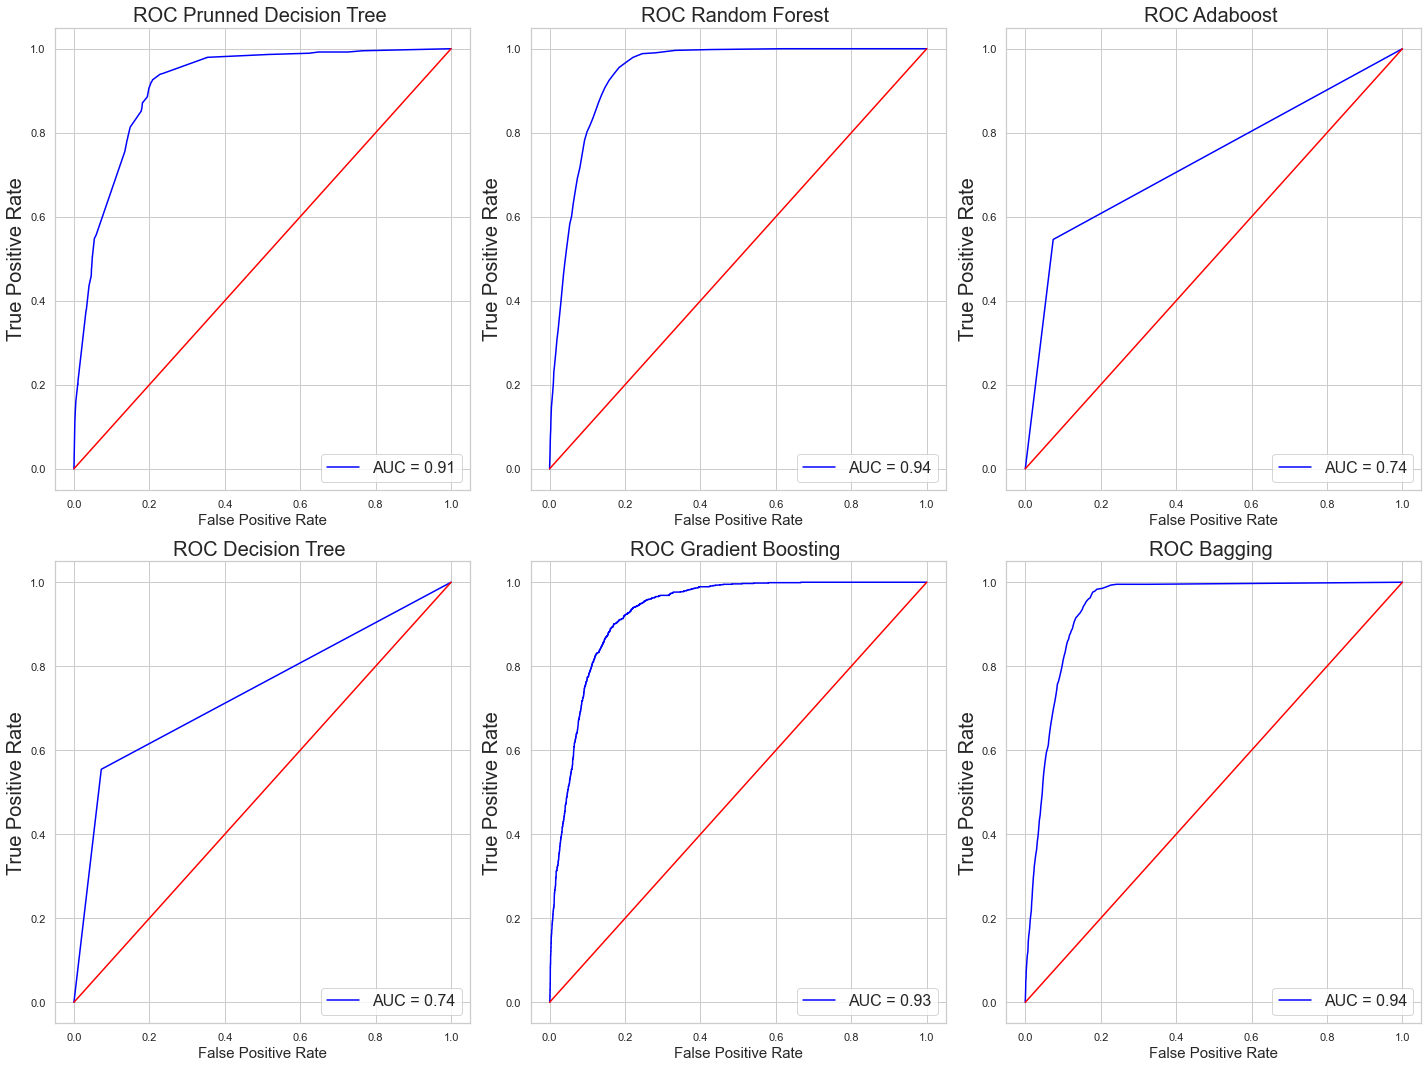

In [216]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#Prunned Decision Tree
probs = reg_dt_model.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'blue', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'red')
ax_arr[0,0].set_title('ROC Prunned Decision Tree ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfcl.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'blue', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'red')
ax_arr[0,1].set_title('ROC Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#Adaboost----------------------
probs = abcl.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'blue', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'red')
ax_arr[0,2].set_title('ROC Adaboost ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dt_model.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'blue', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'red')
ax_arr[1,0].set_title('ROC Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#Gradient Boosting ---------------------
probs = gbcl.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'blue', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'red')
ax_arr[1,1].set_title('ROC Gradient Boosting ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#Bagging
probs = bgcl.predict_proba(X_test)
preds = probs[:,1]
fprbgcl, tprbgcl, thresholdbgcl = metrics.roc_curve(y_test, preds)
roc_aucbgcl = metrics.auc(fprbgcl, tprbgcl)

ax_arr[1,2].plot(fprbgcl, tprbgcl, 'blue', label = 'AUC = %0.2f' % roc_aucbgcl)
ax_arr[1,2].plot([0, 1], [0, 1],'red')
ax_arr[1,2].set_title('ROC Bagging ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.savefig('ROC.png')

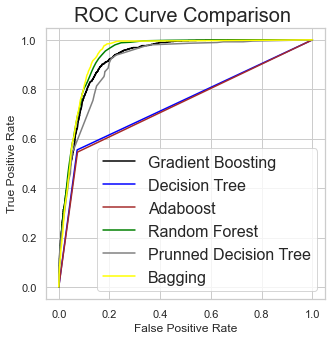

In [217]:
#ALL PLOTS ----------------------------------
fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
ax_arr.plot(fprgau, tprgau, 'b', label = 'Gradient Boosting', color='black')
ax_arr.plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr.plot(fprknn, tprknn, 'b', label = 'Adaboost', color='brown')
ax_arr.plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr.plot(fprlog, tprlog, 'b', label = 'Prunned Decision Tree', color='grey')
ax_arr.plot(fprbgcl, tprbgcl, 'b', label = 'Bagging', color='yellow')
ax_arr.set_title('ROC Curve Comparison ',fontsize=20)
ax_arr.set_ylabel('True Positive Rate',fontsize=12)
ax_arr.set_xlabel('False Positive Rate',fontsize=12)
ax_arr.legend(loc = 'lower right', prop={'size': 16})

plt.savefig('ROC Compare.png')
plt.show()

###  Prediction on test dataset given in the competition

In [218]:
test = pd.read_csv('Test data.csv')
test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [219]:
test.info()
# Missing columns are :- customer_age, marital, balance, personal_loan, last_contact_duration,num_contacts_in_campaign 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [220]:
test.drop('days_since_prev_campaign_contact',1,inplace = True)

#### customer age

In [221]:
# outlier treatment 
test.loc[test.customer_age > 72,['customer_age']] = 72
test.loc[test.customer_age < 18,['customer_age']] = 18

In [222]:
# missing value
for i in range(test.shape[0]):
    if pd.isna(test.customer_age[i]) == True:
        test.customer_age[i] = (val0 + val1)/2

<ipython-input-222-50cf136106f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.customer_age[i] = (val0 + val1)/2


In [223]:
test.customer_age.isna().sum()

0

#### Job_type 

In [224]:
test.job_type.value_counts()

blue-collar      2916
management       2792
technician       2377
admin.           1544
services         1231
retired           673
self-employed     468
entrepreneur      450
unemployed        402
housemaid         347
student           275
unknown            89
Name: job_type, dtype: int64

In [225]:
for i in range(test.shape[0]):
    if (test.job_type[i]) == 'unknown':
        test.job_type[i] = job0[0]

<ipython-input-225-97449e621a32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.job_type[i] = job0[0]


In [226]:
test.job_type.isna().sum()

0

#### Marital 

In [227]:
test.marital.value_counts().index[0]

'married'

In [228]:
for i in range(test.shape[0]):
    if pd.isna(test.marital[i]) == True:
        test.marital[i] = test.marital.value_counts().index[0]

<ipython-input-228-88f27d682d60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.marital[i] = test.marital.value_counts().index[0]


In [229]:
test.marital.isna().sum()

0

#### Education 

In [230]:
test.education.value_counts()

secondary    6955
tertiary     3980
primary      2064
unknown       565
Name: education, dtype: int64

In [231]:
for i in range(test.shape[0]):
    if (test.education[i]) == 'unknown':
        test.education[i] = ed0[0]

<ipython-input-231-334fe33c7364>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.education[i] = ed0[0]


In [232]:
test.education.value_counts()

secondary    7520
tertiary     3980
primary      2064
Name: education, dtype: int64

#### Default 

In [233]:
test.default.value_counts()

no     13302
yes      262
Name: default, dtype: int64

In [234]:
test.default.isna().sum()

0

#### Balance

In [235]:
test.loc[test.balance > 3424.5,['balance']] = 3424.5
test.loc[test.balance < -1939.5,['balance']] = -1939.5

In [236]:
for i in range(test.shape[0]):
    if pd.isna(test.balance[i]) == True:
        test.balance[i] = (bal0 + bal1)/2

<ipython-input-236-2128d6537f25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.balance[i] = (bal0 + bal1)/2


In [237]:
test.balance.isna().sum()

0

#### Housing Loan 

In [238]:
test.housing_loan.value_counts()

yes    7430
no     6134
Name: housing_loan, dtype: int64

#### personal loan 

In [239]:
for i in range(test.shape[0]):
    if pd.isna(test.personal_loan[i]) == True:
        test.personal_loan[i] = pl0[0]

<ipython-input-239-aad3d99234b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.personal_loan[i] = pl0[0]


In [240]:
test.personal_loan.isna().sum()

0

####  communication_type

In [241]:
test.communication_type.value_counts()

cellular     8805
unknown      3869
telephone     890
Name: communication_type, dtype: int64

#### day_of_month

In [242]:
test.day_of_month.value_counts()

20    808
18    693
21    612
6     590
5     574
17    573
8     566
28    562
14    554
7     548
19    508
29    505
13    505
15    502
12    481
30    479
9     460
4     436
16    430
11    417
2     408
27    341
26    320
3     312
22    287
23    269
25    257
31    174
10    171
24    135
1      87
Name: day_of_month, dtype: int64

#### month 

In [243]:
test.month.value_counts()

may    4081
jul    2109
aug    1939
jun    1595
nov    1169
apr     821
feb     813
jan     450
oct     228
sep     162
mar     139
dec      58
Name: month, dtype: int64

#### last_contact_duration 

In [244]:
for i in range(test.shape[0]):
    if pd.isna(test.last_contact_duration[i]) == True:
        test.last_contact_duration[i] = (last0 + last1)/2

<ipython-input-244-00f03220eaf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.last_contact_duration[i] = (last0 + last1)/2


In [245]:
test.last_contact_duration.isna().sum()

0

In [246]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13564 non-null  object 
 1   customer_age                13564 non-null  float64
 2   job_type                    13564 non-null  object 
 3   marital                     13564 non-null  object 
 4   education                   13564 non-null  object 
 5   default                     13564 non-null  object 
 6   balance                     13564 non-null  float64
 7   housing_loan                13564 non-null  object 
 8   personal_loan               13564 non-null  object 
 9   communication_type          13564 non-null  object 
 10  day_of_month                13564 non-null  int64  
 11  month                       13564 non-null  object 
 12  last_contact_duration       13564 non-null  float64
 13  num_contacts_in_campaign    135

In [247]:
train.corr(method = 'pearson')

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.122729,-0.011855,-0.010691,0.006698,-0.002682,0.025979
balance,0.122729,1.000000,0.007521,0.044123,-0.033850,0.029574,0.095212
day_of_month,-0.011855,0.007521,1.000000,-0.042553,0.165168,-0.050760,-0.026060
last_contact_duration,-0.010691,0.044123,-0.042553,1.000000,-0.122200,0.011560,0.407478
num_contacts_in_campaign,0.006698,-0.033850,0.165168,-0.122200,1.000000,-0.033212,-0.070675
num_contacts_prev_campaign,-0.002682,0.029574,-0.050760,0.011560,-0.033212,1.000000,0.089855
term_deposit_subscribed,0.025979,0.095212,-0.026060,0.407478,-0.070675,0.089855,1.000000


In [248]:
for i in range(test.shape[0]):
    if pd.isna(test.num_contacts_in_campaign[i]) == True:
        test.num_contacts_in_campaign[i] = test.day_of_month[i]

<ipython-input-248-412b7870870e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.num_contacts_in_campaign[i] = test.day_of_month[i]


In [249]:
test.num_contacts_in_campaign.isna().sum()

0

In [250]:
test1 = pd.get_dummies(data=test, columns=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], drop_first = False)

In [251]:
test1.head()

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_17231,55.0,3424.5,13,90.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,id_34508,24.0,179.0,18,63.0,2.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,id_44504,46.0,143.0,8,208.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,id_174,56.0,3424.5,6,34.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,id_2115,62.0,2913.0,12,127.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [252]:
test1.drop('id',1,inplace = True)
y_predict = rfcl.predict(test1)
submisison = pd.DataFrame({'id' : test.id,'term_deposit_subscribed' : y_predict})

In [253]:
submisison.head()

,id,term_deposit_subscribed
0,id_17231,1
1,id_34508,1
2,id_44504,1
3,id_174,1
4,id_2115,1


In [254]:
submisison.to_csv('submission.csv', index = False)

In [255]:
variable_importance = (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = ov_data_X.columns))
variable_importance.sort_values(by=['Imp'], ascending= False)

,Imp
last_contact_duration,0.317560
num_contacts_in_campaign,0.068121
balance,0.057942
customer_age,0.046308
housing_loan_yes,0.045752
day_of_month,0.045567
prev_campaign_outcome_success,0.040237
housing_loan_no,0.039368
communication_type_unknown,0.028086
marital_married,0.024577


In [256]:
imp = list(variable_importance.index[:15])
for var in imp:
    print(var)

customer_age
balance
day_of_month
last_contact_duration
num_contacts_in_campaign
num_contacts_prev_campaign
job_type_admin.
job_type_blue-collar
job_type_entrepreneur
job_type_housemaid
job_type_management
job_type_retired
job_type_self-employed
job_type_services
job_type_student
